<a href="https://colab.research.google.com/github/AliyaBadmaeva/netflix_analytics/blob/main/DeepDataDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Групповой проект команды 3D: Deep Data Discovery
##Предмет: Python для автоматизации и анализа данных
##Преподаватели: Ассоль Кубаева, Евгений Паточенко
##Проект выполнили: Есаков Никита, Шиндерук Виктория, Бадмаева Алия
###Группа: DS-19

In [ ]:
#!pip install bs4

In [ ]:
#!pip install lxml

In [ ]:
#from bs4 import BeautifulSoup

In [ ]:
# Импорт необходимых бибилиотек
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import numpy as np
import requests
import json
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.patches as mpatches

In [ ]:
# Путь к датасету
NETFLIX_SHOWS = 'https://github.com/evgpat/datasets/raw/refs/heads/main/NetflixShows.xlsx'

In [ ]:
data = pd.read_excel(NETFLIX_SHOWS)  # прочитаем данные в эксел формате
del data['ratingDescription'], data['user rating size']  # удалим ненужные признаки

In [ ]:
data.head(10)  # посмотрим на первые 10 строк датасета

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [ ]:
data.info()  # посмотрим на информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
data.describe()  # описательные характеристики для числовых признаков

,release year,user rating score
count,1000.000000,605.000000
mean,2010.335000,84.094215
std,8.877927,12.344371
min,1940.000000,55.000000
25%,2007.000000,75.000000
50%,2015.000000,88.000000
75%,2016.000000,95.000000
max,2017.000000,99.000000


In [ ]:
data['title'].value_counts()  # посмотрим на уникальные значения по признаку с количеством повторов

,count
title,
13 Reasons Why,8
Girlboss,7
Prison Break,7
New Girl,6
Pretty Little Liars,6
...,...
Winnie the Pooh: Springtime with Roo,1
Batched,1
Atlantis: Milo's Return,1


In [ ]:
data['rating'].nunique()  # всего уникальных значений по признаку raing - возрастные категории для ТВ-шоу

13

In [ ]:
data['rating'].value_counts()  # посмотрим на рейтинг по возрастным категориям

,count
rating,
TV-14,234
PG,170
TV-MA,148
G,138
TV-Y,68
TV-PG,59
TV-G,52
TV-Y7-FV,44
TV-Y7,38


In [ ]:
data.head()  # еще раз посмотрим на датасет

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


In [ ]:
data[data.isna().any(axis=1)]  # пропуски NaN в одном из столбцов есть для 426 строк

,title,rating,ratingLevel,release year,user rating score
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
14,The Hunter,R,language and brief violence,2011,NaN
15,Lottie Dottie Chicken,TV-Y,Suitable for all ages.,2009,NaN
21,"ÌÒ Pai, ÌÒ - Look at This",TV-MA,For mature audiences. May not be suitable for...,2007,NaN
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,2013,NaN
...,...,...,...,...,...
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
data.duplicated().sum()  # количество дублей в датафрейме - > 500

np.int64(500)

In [ ]:
data['title'].nunique()  # количество уникальных значений в колонке title (название ТВ-шоу)

496

In [ ]:
data['title'].value_counts().head(20)

,count
title,
13 Reasons Why,8
Girlboss,7
Prison Break,7
New Girl,6
Pretty Little Liars,6
The Vampire Diaries,6
Anastasia,6
The Secret Life of Pets,6
Dinotrux,6


In [ ]:
sns.set(style="darkgrid")  # установить черную сетку для графиков
plt.style.use('dark_background')  # установить черный фон для графиков матплотлиб

#ИССЛЕДОВАНИЕ ДАННЫХ НА ДУБЛИКАТЫ

/tmp/ipython-input-90-2148257081.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



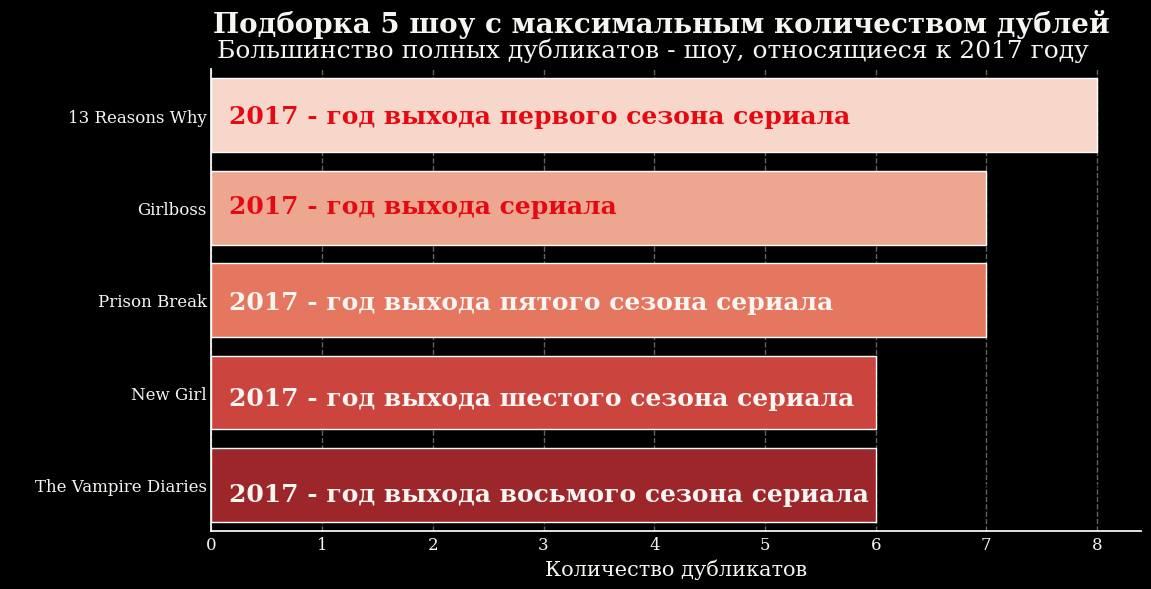

In [ ]:
duplicates_count = data.groupby('title').size().reset_index(name='count')  # сгруппировали по количеству повторов признака title
duplicates_count = duplicates_count.sort_values(by='count', ascending=False)  # сортировка по убыванию количества повторов признака title

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax = sns.barplot(x='count', y='title', hue='title',
            data=duplicates_count.head(5), palette='Reds')
# Удалить границу графика
for s in ['top', 'right']:  # сверху и справа
    ax.spines[s].set_visible(False)  # делаем навидимыми выбранные границы

# Заголовок и подзаголовок
fig.suptitle('Подборка 5 шоу с максимальным количеством дублей', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.13, 0.90, 'Большинство полных дубликатов - шоу, относящиеся к 2017 году', fontsize=18, fontweight='light', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.79, '2017 - год выхода первого сезона сериала', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.14, 0.64, '2017 - год выхода сериала', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.14, 0.48, '2017 - год выхода пятого сезона сериала', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.32, '2017 - год выхода шестого сезона сериала', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.16, '2017 - год выхода восьмого сезона сериала', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')

# Значения по оси х
ax.set_xticklabels(data.index) # индексы по оси х

ax.grid(axis='x', linestyle='--', alpha=0.4, color='#f5f5f1') # линии сетки по оси х, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='y', color='black')
grid_x_ticks = np.arange(0, 9, 1) # по оси х настраиваем шкалу от 0 до 8 не включительно с шагом 1
ax.set_xticks(grid_x_ticks)  # передаем как аргумент настроенную шкалу по х, чтобы она показалась на графике с помощью set_xticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.set_xlabel('Количество дубликатов', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Название сериала', fontsize=15, fontweight='light', fontfamily='serif', color='black')
fig.savefig('duplicates.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
fig.show()


**Проанализировав данные на дубликаты, их оказалось 50%, большинство из них относится к 2017 году – новые шоу. Возможно Нетфликс чаще рекомендует именно новые шоу.**

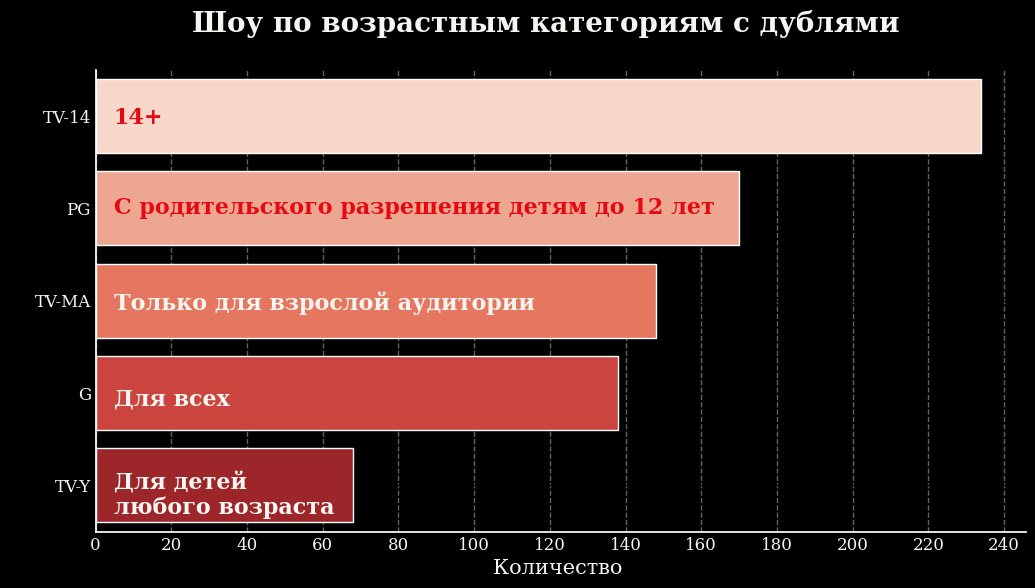

In [ ]:
duplicates_count = data.groupby('rating').size().reset_index(name='count')
duplicates_count = duplicates_count.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax = sns.barplot(x='count', y='rating', hue='rating',
            data=duplicates_count.head(5), palette='Reds')
# Удалить границу графика
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем невидимыми границы выбранные

# Заголовок и подзаголовок
fig.suptitle('Шоу по возрастным категориям с дублями', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.79, '14+', fontsize=16, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.14, 0.64, 'C родительского разрешения детям до 12 лет', fontsize=16, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.14, 0.48, 'Только для взрослой аудитории', fontsize=16, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.32, 'Для всех', fontsize=16, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.18, 'Для детей', fontsize=16, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.14, 0.14, 'любого возраста', fontsize=16, fontweight='bold', fontfamily='serif', color='#f5f5f1')

ax.grid(axis='x', linestyle='--', alpha=0.4, color='#f5f5f1') # линии сетки по оси х, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='y', color='black')
grid_x_ticks = np.arange(0, 260, 20)
ax.set_xticks(grid_x_ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('Количество ', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Название сериала', fontsize=15, fontweight='light', fontfamily='serif', color='black')

plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)

fig.savefig('duplicates_ages.png', dpi=100,  # сохраним фигуру в среду разработки
        bbox_inches='tight', pad_inches=0.1
       )
fig.show()  # показать график


**Действительно Netflix больше продвигает свежевышедшие шоу с возрастным ограничением, с которого начинал просмотры пользователь (или которые указал при заведении профиля).**

In [ ]:
data['title'].value_counts().head(25)

,count
title,
13 Reasons Why,8
Girlboss,7
Prison Break,7
New Girl,6
Pretty Little Liars,6
The Vampire Diaries,6
Anastasia,6
The Secret Life of Pets,6
Dinotrux,6


In [ ]:
data[data['title'] == '13 Reasons Why']  # Пример дублей по названию (title) "13 Reasons Why"

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
141,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
189,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
241,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
295,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
347,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
396,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
497,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0


In [ ]:
data[data['title'] == 'Girlboss']

,title,rating,ratingLevel,release year,user rating score
39,Girlboss,TV-MA,NaN,2017,94.0
93,Girlboss,TV-MA,NaN,2017,94.0
138,Girlboss,TV-MA,NaN,2017,94.0
187,Girlboss,TV-MA,NaN,2017,94.0
346,Girlboss,TV-MA,NaN,2017,94.0
395,Girlboss,TV-MA,NaN,2017,94.0
496,Girlboss,TV-MA,NaN,2017,94.0


In [ ]:
data[data['title'] == 'Prison Break']

,title,rating,ratingLevel,release year,user rating score
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
53,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
264,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
311,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
355,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
405,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
454,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0


In [ ]:
# Сделаем датасет без пропусков в столбце 'user_rating_score'
data_clean = data.dropna(subset=['user rating score'])

In [ ]:
# Сгруппируем шоу по частоте их вхождения в датасет и их пользовательской оценке
freq_data = data_clean.groupby('title').agg(
  frequency=('title', 'size'),
  user_rating_score=('user rating score', 'first')
).reset_index()

freq_data.head()

,title,frequency,user_rating_score
0,90210,3,62.0
1,10 Things I Hate About You,1,68.0
2,13 Reasons Why,8,99.0
3,30 Rock,2,66.0
4,Absolutely Fabulous,1,59.0


#ИССЛЕДОВАНИЕ НА ЗАВИСИМОСТЬ ПРИЗНАКОВ


In [ ]:
# Сделаем scatter plot и добавим линию тренда с помощью бибилиотеки plotly express
fig_trend = px.scatter(
    freq_data,  # датасет
    x='user_rating_score',  # признак для оси х
    y='frequency',   # признак для оси у
    hover_data=['title'],
    trendline='ols', trendline_color_override="#e50914",  # линия и цвет тренда
    title='Зависимость частоты появления сериала от его средней оценки с трендовой линией',  # подпись графика
    labels={
        'user_rating_score': 'Средняя оценка пользователей',  # подпись по оси х
        'frequency': 'Частота появления сериала'  # подпись по оси у
    }
)
fig_trend.update_layout(
    font=dict(family='serif',size=20, color="#f5f5f1"))
fig_trend.update_xaxes(title_font=dict(size=20, family='serif', color='#f5f5f1'), gridwidth=0.2, gridcolor='#221f1f')
fig_trend.update_yaxes(title_font=dict(size=20, family='serif', color='#f5f5f1'), gridwidth=0.2, gridcolor='#221f1f')
fig_trend.update_traces(selector=dict(mode='markers'), marker=dict(size=10, color='#e50914'))

# корреляция
corr_value = np.corrcoef(freq_data['user_rating_score'], freq_data['frequency'])[0, 1]

# аннотация - надпись на графике
fig_trend.add_annotation(
    xref="paper",
    yref="paper",
    x=0.52,
    y=0.80,
    text=f"Коэффициент корреляции: {corr_value:.2f}",
    showarrow=False,
    font=dict(size=18, family='serif', color='#f5f5f1')
)
fig_trend.update_layout(paper_bgcolor='black',  # черный фон
    plot_bgcolor='black')      # белый текст

fig_trend.show()

**Существует умеренная прямая корреляция между количеством выпуска шоу и его средней оценкой. Мы предполагаем наличие других факторов, влияющие на алгоритм рекомендаций. Вероятно свежему шоу с невысокими оценками или без них сложно набрать рейтинг, соответственно оно реже рекомендуется.
Инсайт: выпуск нового шоу должен сопровождаться частым появлением его в рекомендациях для получения зрительских оценок.**


In [ ]:
g = data[data['rating'] == 'G']
g

,title,rating,ratingLevel,release year,user rating score
259,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0
307,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0
502,Chicken Little,G,General Audiences. Suitable for all ages.,2005,92.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
507,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
...,...,...,...,...,...
975,The Fox and the Hound 2,G,General Audiences. Suitable for all ages.,2006,NaN
983,Beverly Hills Chihuahua 3: Viva La Fiesta!,G,General Audiences. Suitable for all ages.,2012,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN


In [ ]:
g['title'].value_counts().head(20)

,count
title,
Anastasia,6
The Emperor's New Groove,5
Tarzan,5
Balto 2: Wolf Quest,5
Balto,5
An American Tail: Fievel Goes West,5
Babe: Pig in the City,4
The Smurfs and the Magic Flute,4
Growing Up Wild,4


In [ ]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 259 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              138 non-null    object 
 1   rating             138 non-null    object 
 2   ratingLevel        134 non-null    object 
 3   release year       138 non-null    int64  
 4   user rating score  57 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
pg = data[data['rating'] == 'PG']
pg

,title,rating,ratingLevel,release year,user rating score
86,Zootopia,PG,"some thematic elements, rude humor and action",2016,97.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
91,Pete's Dragon,PG,"for action, peril and brief language",2016,93.0
180,Kubo and the Two Strings,PG,"thematic elements, scary images, action and peril",2016,96.0
184,Queen of Katwe,PG,"thematic elements, an accident scene and some ...",2016,NaN
...,...,...,...,...,...
981,Dolphin Tale,PG,some mild thematic elements,2011,NaN
988,Paddington,PG,mild action and rude humor,2014,70.0
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0


In [ ]:
pg = data[data['rating'] == 'PG']
pg

,title,rating,ratingLevel,release year,user rating score
86,Zootopia,PG,"some thematic elements, rude humor and action",2016,97.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
91,Pete's Dragon,PG,"for action, peril and brief language",2016,93.0
180,Kubo and the Two Strings,PG,"thematic elements, scary images, action and peril",2016,96.0
184,Queen of Katwe,PG,"thematic elements, an accident scene and some ...",2016,NaN
...,...,...,...,...,...
981,Dolphin Tale,PG,some mild thematic elements,2011,NaN
988,Paddington,PG,mild action and rude humor,2014,70.0
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0


In [ ]:
pg['title'].value_counts().head(20)

,count
title,
The Iron Giant,6
The Secret Life of Pets,6
Zootopia,5
Finding Dory,5
Cool Runnings,5
Scooby-Doo,5
Antz,5
Hotel Transylvania 2,4
The Jungle Book,4


In [ ]:
tv_14 = data[data['rating'] == 'TV-14']
tv_14

,title,rating,ratingLevel,release year,user rating score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
...,...,...,...,...,...
489,Rosewood,TV-14,Parents strongly cautioned. May be unsuitable ...,2015,81.0
491,Quantico,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,88.0
492,Limitless,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,84.0
495,No Tomorrow,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN


In [ ]:
pg['title'].value_counts().head(20)

,count
title,
The Iron Giant,6
The Secret Life of Pets,6
Zootopia,5
Finding Dory,5
Cool Runnings,5
Scooby-Doo,5
Antz,5
Hotel Transylvania 2,4
The Jungle Book,4


In [ ]:
tv_ma = data[data['rating'] == 'TV-MA']
tv_ma

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,2016,80.0
21,"ÌÒ Pai, ÌÒ - Look at This",TV-MA,For mature audiences. May not be suitable for...,2007,NaN
24,Marvel's Luke Cage,TV-MA,For mature audiences. May not be suitable for...,2016,95.0
...,...,...,...,...,...
493,American Crime Story: The People v. O.J. Simpson,TV-MA,For mature audiences. May not be suitable for...,2016,79.0
494,Santa Clarita Diet,TV-MA,For mature audiences. May not be suitable for...,2017,82.0
496,Girlboss,TV-MA,NaN,2017,94.0
497,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0


In [ ]:
tv_ma = tv_ma.drop_duplicates()
tv_ma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 6 to 493
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              82 non-null     object 
 1   rating             82 non-null     object 
 2   ratingLevel        60 non-null     object 
 3   release year       82 non-null     int64  
 4   user rating score  40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ KB


In [ ]:
tv_ma['title'].value_counts().head(20)

,count
title,
Skins,2
The Walking Dead,1
Black Mirror,1
"ÌÒ Pai, ÌÒ - Look at This",1
Marvel's Luke Cage,1
Marvel's Iron Fist,1
Narcos,1
The Do-Over,1
OperaÌ¤Ìµes Especiais,1


In [ ]:
data[data['title'] == 'New Girl']

,title,rating,ratingLevel,release year,user rating score
70,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0
112,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0
209,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0
282,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0
331,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0
470,New Girl,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,91.0


In [ ]:
nr = data[data['rating'] == 'NR']
nr

,title,rating,ratingLevel,release year,user rating score
19,The 100,NR,This movie has not been rated.,2016,97.0
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,2013,NaN
23,Hunter X Hunter (2011),NR,This movie has not been rated.,2013,57.0
37,"Sex, Love and Therapy",NR,This movie has not been rated.,2014,NaN
46,Stronger Than the World,NR,NaN,2016,NaN
47,Back and Forth,NR,This movie has not been rated.,2016,NaN
76,The 100,NR,This movie has not been rated.,2016,97.0
149,Almost Adults,NR,This movie has not been rated.,2016,NaN
191,Honeytrap,NR,This movie has not been rated.,2014,NaN
194,Like Cotton Twines,NR,NaN,2016,NaN


In [ ]:
nr['title'].value_counts()

,count
title,
The 100,3
Almost Adults,3
Nymphomaniac: Volume 1,1
Hunter X Hunter (2011),1
Stronger Than the World,1
"Sex, Love and Therapy",1
Back and Forth,1
Honeytrap,1
Like Cotton Twines,1


In [ ]:
data['rating'].value_counts()

,count
rating,
TV-14,234
PG,170
TV-MA,148
G,138
TV-Y,68
TV-PG,59
TV-G,52
TV-Y7-FV,44
TV-Y7,38


In [ ]:
pg_13 = data[data['rating'] == 'PG-13']
pg_13['title'].value_counts()

,count
title,
The Waterboy,2
Mean Girls 2,2
Twilight,2
White Chicks,1
How to Lose a Guy in 10 Days,1
10 Things I Hate About You,1
Step Up,1
The Benchwarmers,1
Safe Haven,1


In [ ]:
da = data['title'].str.startswith('S')
da

,title
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
da[da==True]

,title
5,True
11,True
29,True
36,True
37,True
...,...
721,True
804,True
822,True
845,True


In [ ]:
pg_13['title'].nunique()

12

In [ ]:
pg_13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 372
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              15 non-null     object 
 1   rating             15 non-null     object 
 2   ratingLevel        15 non-null     object 
 3   release year       15 non-null     int64  
 4   user rating score  11 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 720.0+ bytes


In [ ]:
tv_14 = tv_14.drop_duplicates()
tv_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 2 to 486
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              106 non-null    object 
 1   rating             106 non-null    object 
 2   ratingLevel        101 non-null    object 
 3   release year       106 non-null    int64  
 4   user rating score  77 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ KB


In [ ]:
r = data[data['rating'] == 'R']
r['title'].nunique()

14

In [ ]:
tv_y_7 = data[data['rating'] == 'TV-Y7']
tv_y_7['title'].nunique()

23

In [ ]:
tv_y7_fv = data[data['rating'] == 'TV-Y7-FV']
tv_y7_fv['title'].nunique()

25

In [ ]:
tv_g = data[data['rating'] == 'TV-G']
tv_g['title'].nunique()

29

In [ ]:
tv_pg = data[data['rating'] == 'TV-PG']
tv_pg['title'].nunique()

33

In [ ]:
tv_y = data[data['rating'] == 'TV-Y']
tv_y['title'].nunique()

36

In [ ]:
#data['title'] = data['title'].str.replace(",", '').str.replace("'", '').str.replace(" ", '')  # заменить все ненужные символы

In [ ]:
#data['title'] = data['title'].str.replace("(", '').str.replace(")", '').str.replace("-", '').str.replace(":", '').str.replace(";", '').str.replace("!", '').str.replace(".", '').str.replace("  ", '')

In [ ]:
#data['title'] = data['title'].astype(str)

In [ ]:
#all_titles = " ".join(data['title'])  # получаем строку из названий шоу, разделенных друг от друга пробелом
#all_titles

In [ ]:
# Построенное облако слов из названий ТВ-шоу.
# Поскольку в дальнейшем мы хотели, чтобы названия ТВ-шоу были представлены в первозданном виде, мы закомментировали этот код

#ordcloud_titles = WordCloud(width=1920, height=1080, background_color='black', colormap='Reds').generate(all_titles)
#plt.figure(figsize=(15,10))
#plt.imshow(wordcloud_titles, interpolation='bilinear')
#plt.axis('off')

#plt.savefig('word_of_cloud.png', dpi=100,
#        bbox_inches='tight', pad_inches=0.1
#       )
#plt.show()

In [ ]:
df = data.drop_duplicates(keep="first")  # в другую переменную запишем очищенный от дублей датафрейм, оставим только первые значения
df.head()

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


#АНАЛИЗ ДАННЫХ НА ПРОПУСКИ ПОСЛЕ ОЧИСТКИ ОТ ДУБЛЕЙ

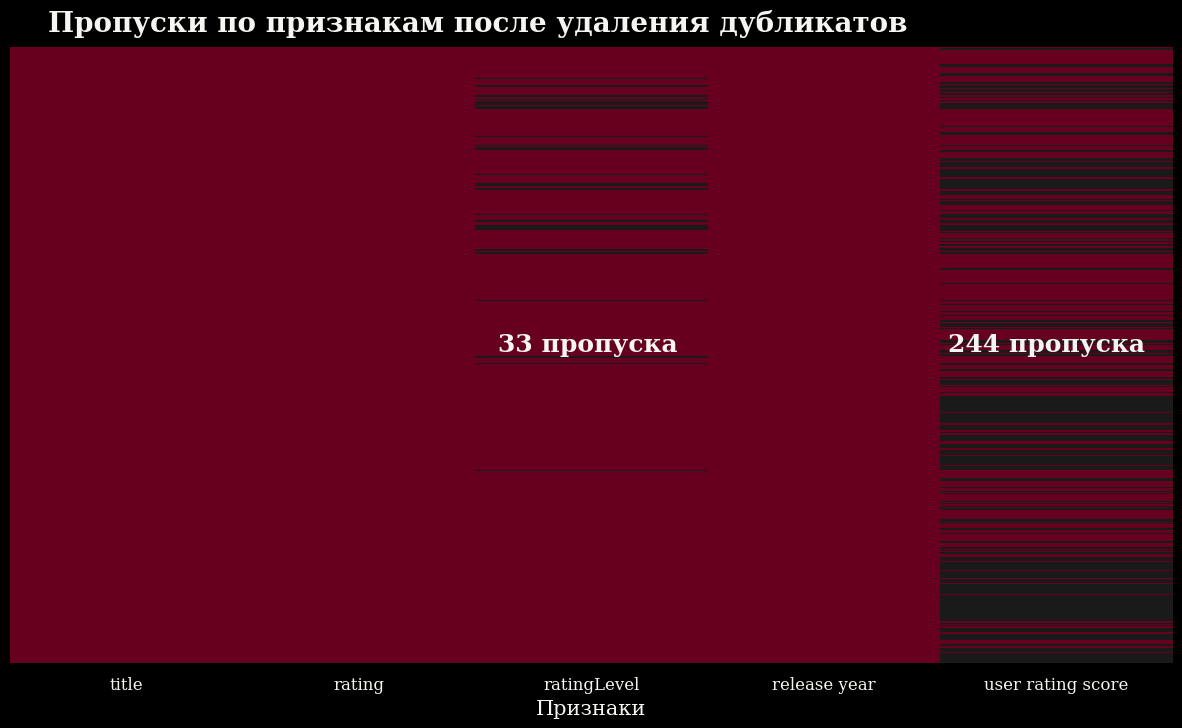

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

# Удалить границу графика
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные

# Заголовок и подзаголовок
fig.text(0.15, 0.90, 'Пропуски по признакам после удаления дубликатов', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.75, 0.50, '244 пропуска', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.45, 0.50, '33 пропуска', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')


ax = sns.heatmap(df.isnull(), cmap='RdGy', cbar=False, yticklabels=False)
ax.set_xlabel('Признаки', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')

plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)
fig.savefig('missing values.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

fig.show()

**При детектировании пропусков, обнаружено, что больше всего отсутствующих значений для признака – оценка зрителя (целевая переменная).**

In [ ]:
df['ratingLevel'].value_counts()

,count
ratingLevel,
Parents strongly cautioned. May be unsuitable for children ages 14 and under.,100
Suitable for all ages.,65
For mature audiences. May not be suitable for children 17 and under.,60
General Audiences. Suitable for all ages.,52
Parental guidance suggested. May not be suitable for all children.,31
...,...
"some mild, rude humor",1
brief mild language and some rude behavior,1
some reckless behavior,1


In [ ]:
fill_o = df.fillna(0)  # создадим датафрейм, в котором заполним все отсуствующие значения первоначального датасета нолями

In [ ]:
fill_sec = fill_o[fill_o['user rating score'] == 0]  # в отдельный датасет выберем фильтром только значения, где признак пользовательская оценка равен нолю

In [ ]:
fill_sec['release year'].value_counts()  # посмотрим на количество отсуствующих значений оценки зрителя по годам

,count
release year,
2016,60
2015,29
2014,23
2013,22
2017,21
2011,13
2012,11
2009,7
2010,7


In [ ]:
fill_sec.head()

,title,rating,ratingLevel,release year,user rating score
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,0.0
14,The Hunter,R,language and brief violence,2011,0.0
15,Lottie Dottie Chicken,TV-Y,Suitable for all ages.,2009,0.0
21,"ÌÒ Pai, ÌÒ - Look at This",TV-MA,For mature audiences. May not be suitable for...,2007,0.0
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,2013,0.0


In [ ]:
fill_sec = fill_sec[fill_sec['release year'] > 1996]  # поскольку до 1996 года всего по 1 пропуску, а Нетфликс начал официально существовать в 1997 году, мы отфильтровали по году

In [ ]:
fill_sec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              236 non-null    object 
 1   rating             236 non-null    object 
 2   ratingLevel        236 non-null    object 
 3   release year       236 non-null    int64  
 4   user rating score  236 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.1+ KB


#ЧАСТОТА ПОЯВЛЕНИЯ ПРОПУСКОВ В ЗАВИСИМОСТИ ОТ ГОДА ВЫПУСКА ШОУ

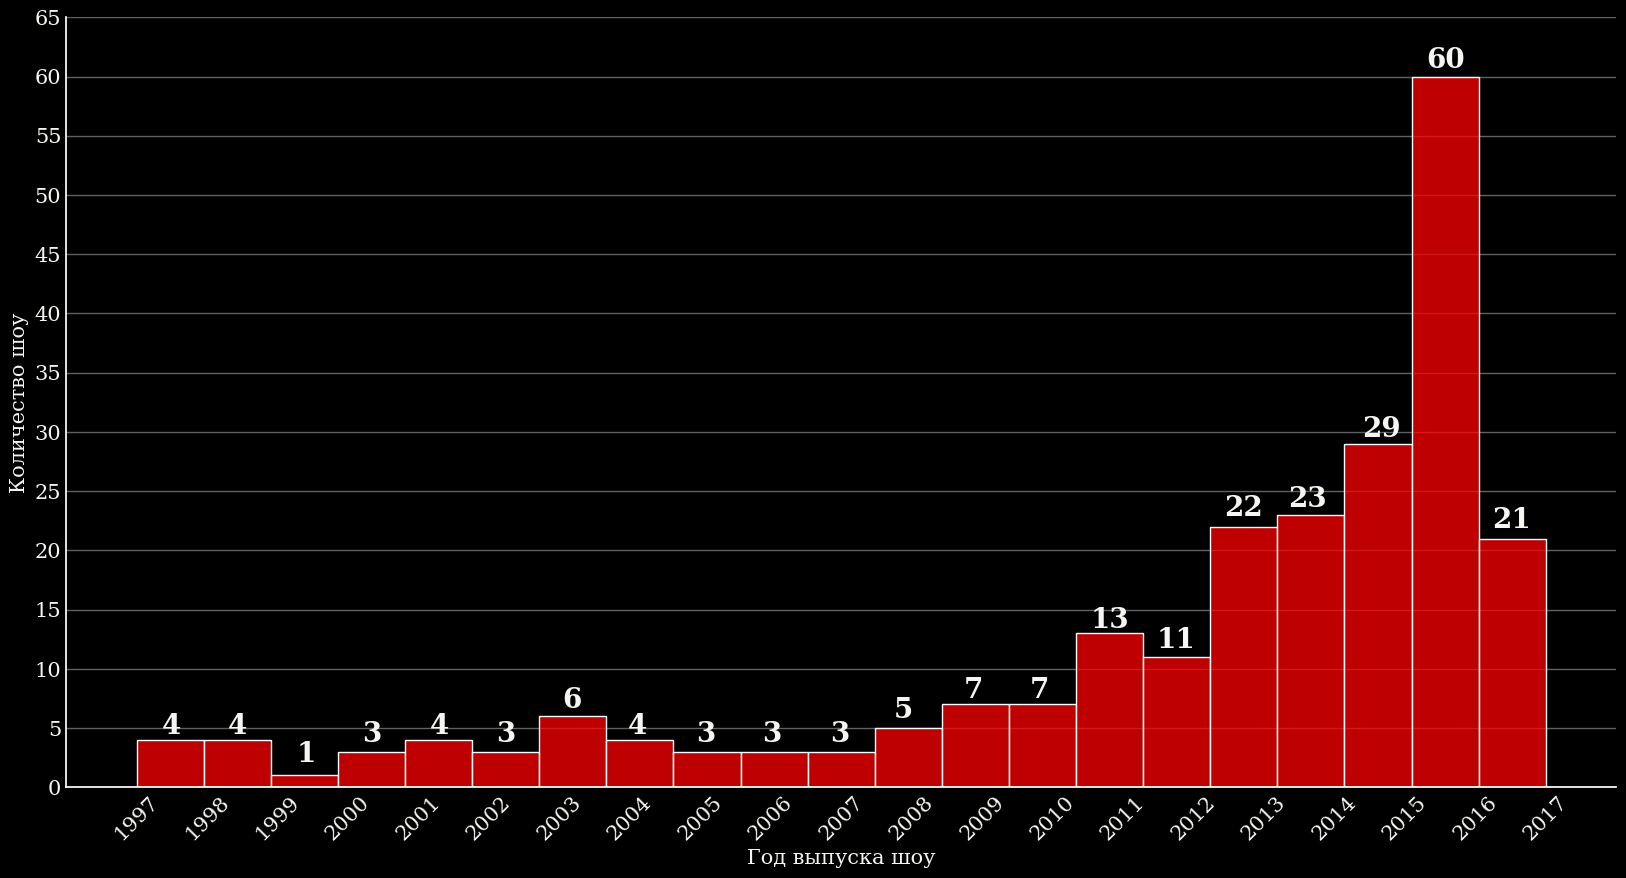

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylabel("Количество шоу", fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_xlabel("Год выпуска шоу", fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax = sns.histplot(x=fill_sec['release year'],
             bins=21,
             ax=ax,
             color='red',
             edgecolor='white')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
grid_y_ticks = np.arange(0, 70, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)

grid_x_ticks = np.arange(1997, 2018) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)
# Заголовок и подзаголовок
#fig.text(0.15, 0.90, 'Частота появления пропусков в зависимости от года выпуска шоу', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
# индексы и поворот меток по оси х
plt.xticks(rotation=45)
fig.text(0.805, 0.83, '60', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.838, 0.37, '21', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.773, 0.46, '29', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.736, 0.39, '23', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.704, 0.382, '22', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.67, 0.25, '11', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.637, 0.27, '13', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.607, 0.20, '7', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.574, 0.20, '7', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.539, 0.18, '5', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.507, 0.156, '3', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.473, 0.156, '3', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.44, 0.156, '3', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.406, 0.163, '4', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.373, 0.19, '6', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.34, 0.156, '3', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.307, 0.163, '4', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.273, 0.156, '3', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.24, 0.136, '1', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.206, 0.163, '4', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.173, 0.163, '4', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=15)

ax.grid(axis='y', linestyle='-', alpha=0.4, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='x', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)
fig.savefig('freq_of_show_per_year.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

**Больше всего пропусков для целевой переменной в 2016 году, возможно дело в новизне фильма.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
df['user rating score'].nunique()

42

In [ ]:
df[df['release year'] < 1989].value_counts()  # смотрим на старые ТВ-шоу (до 1989 г), они все относятся к интересующим пользователя возрастным категориям

,,,,,count
title,rating,ratingLevel,release year,user rating score,
An American Tail,G,General Audiences. Suitable for all ages.,1986,67.0,1
Annie,PG,adult content and mld violence,1982,68.0,1
Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0,1
Grease,PG,Parental guidance suggested. May not be suitable for children.,1978,86.0,1
Harry and the Hendersons,PG,Parental guidance suggested. May not be suitable for children.,1987,58.0,1


In [ ]:
df[df['rating'] == 'UR']

,title,rating,ratingLevel,release year,user rating score
38,White Girl,UR,This movie has not been rated. Intended for ad...,2016,NaN


#ЗАВИСИМОСТЬ ПРИЗНАКОВ

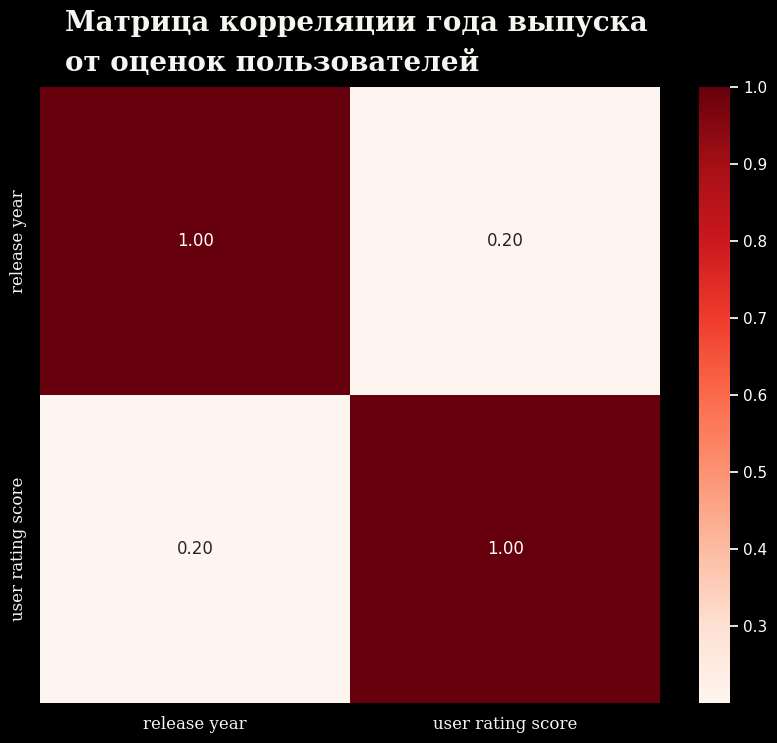

In [ ]:
# Correlation Heatmap of Numerical Features
fig, ax = plt.subplots(1,1, figsize=(10, 8))  # количество графиков по строкам и столбцам, размер фигуры
corr_matrix = df[['release year', 'user rating score']].corr()
fig.text(0.15, 0.95, 'Матрица корреляции года выпуска', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.15, 0.90, 'от оценок пользователей', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
ax = sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)
fig.savefig('corr_matrix.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

fig.show()

**Для признаков год выпуска и оценка зрителя корреляция очень слабая.**

#КОЛИЧЕСТВО ВЫПУСКОВ ШОУ ПО ГОДАМ

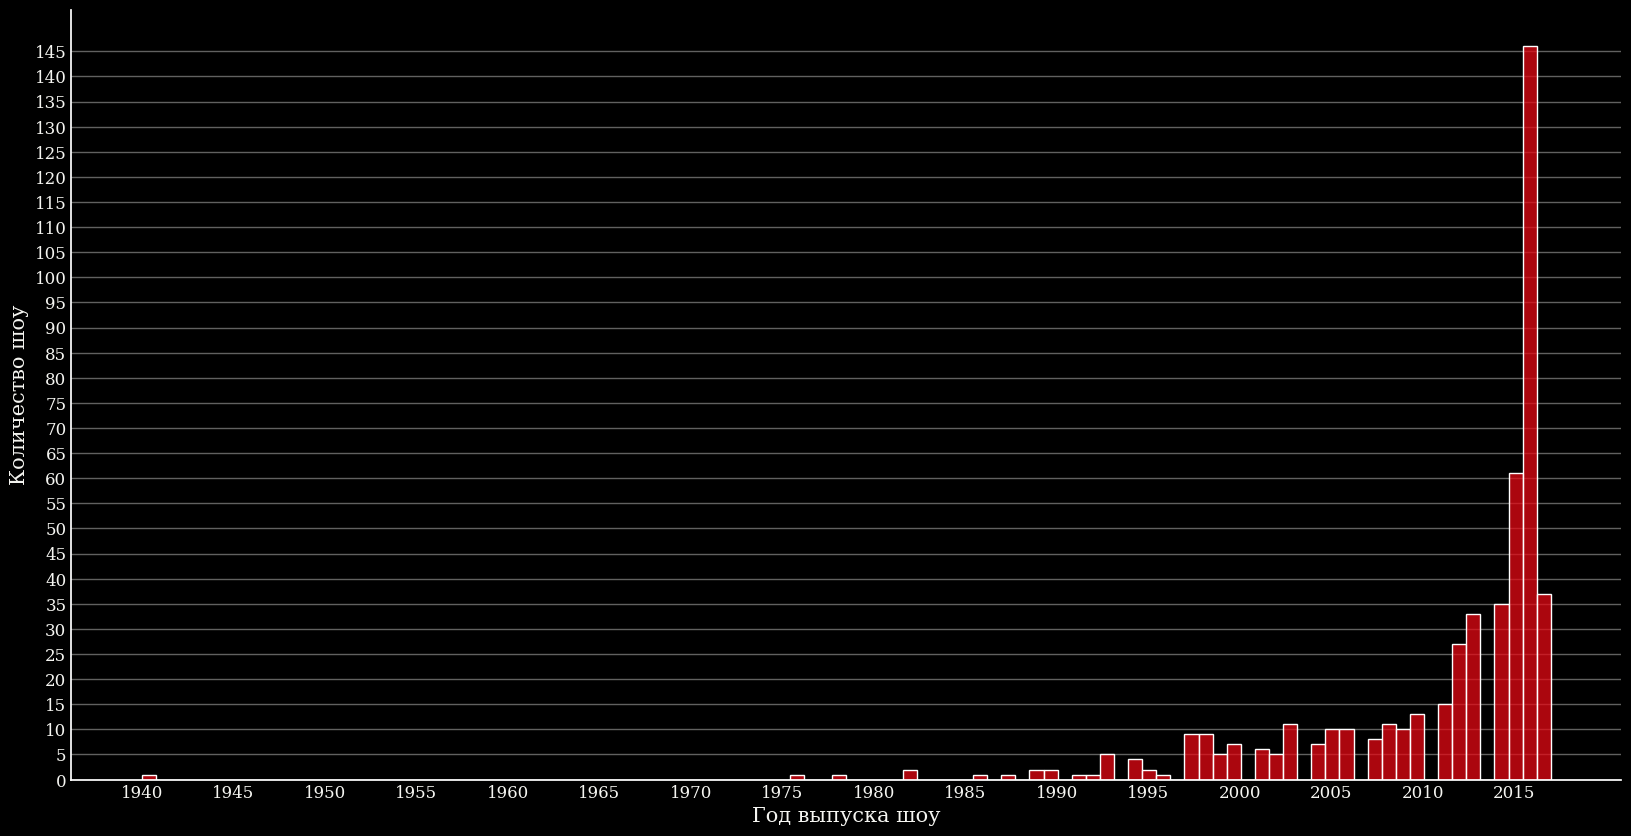

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylabel("Количество шоу", fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_xlabel("Год выпуска шоу", fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax = sns.histplot(x=df['release year'],
                  bins=100,
                  ax=ax,
                  color='#e50914',
                  edgecolor='white')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
grid_y_ticks = np.arange(0, 150, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
grid_x_ticks = np.arange(1940, 2018, 5) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)

plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='y', linestyle='-', alpha=0.4, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='x', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)

#fig.text(0.13, 0.90, 'Количество шоу по годам', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.12, 0.93, 'Популярность Нетфликс растет с каждым годом. Пик выпуска шоу приходится на 2016 г.', fontsize=15, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.12, 0.91, 'Шоу, выпущенных в 2017 г., в датасете меньше, поскольку сам датасет был выпущен 11.06.2017 и не учитывает всех шоу за 2017 г.', fontsize=15, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.savefig('count_of_show.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

**График похож на предыдущую гистограмму, возможно дело не в новизне шоу, а в том, что неоцененные фильмы с малым количеством рекомендаций.
С 2000 по 2016 год на графике наблюдается экспоненциальный рост, указывающий на рост количества шоу. Пик выпуска шоу был в 2016 год. Поскольку датасет был создан в 2017, он не учитывает всех шоу, выпущенных в 2017.**

**13 рейтинговых групп по колонке рейтинг**

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-14,106
TV-MA,82
PG,76
G,53
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


#ИНФОРМАЦИЯ О РАСПРЕДЕЛЕНИИ ОЦЕНОК ПОЛЬЗОВАТЕЛЕЙ ПО ВОЗРАСТНЫМ КАТЕГОРИЯМ

/tmp/ipython-input-148-2040881970.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




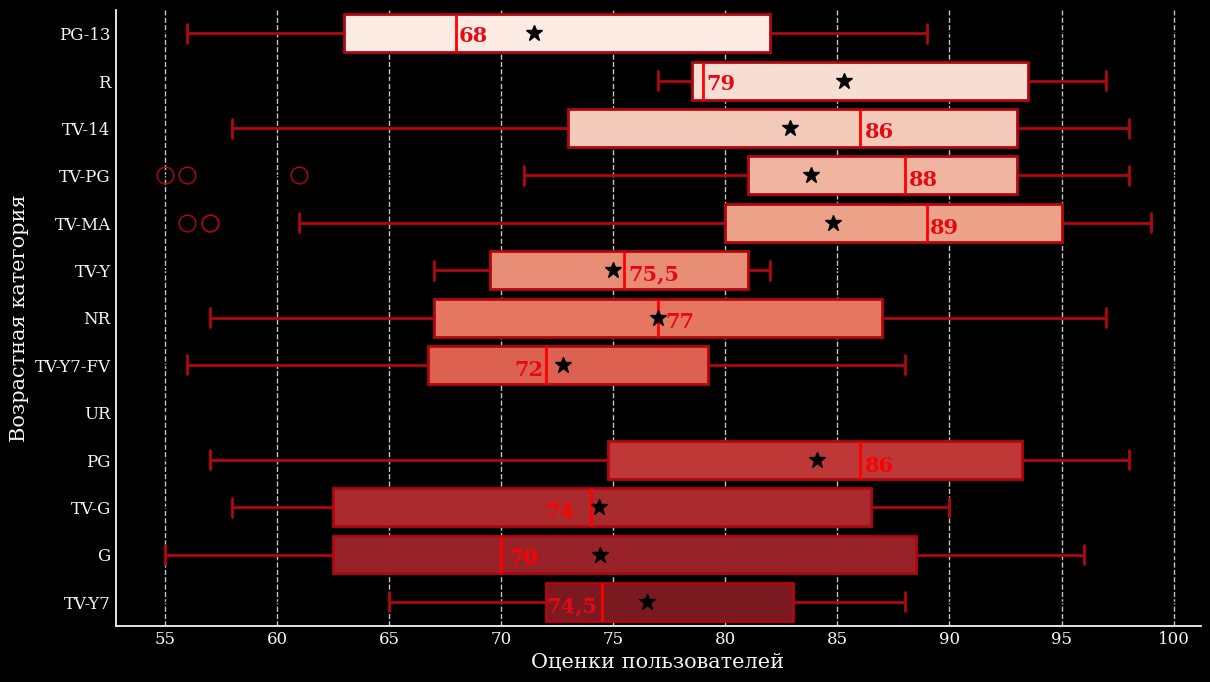

In [ ]:
fig = plt.figure(figsize=(14,8))

flierprops = dict(marker='o', markersize=12,
                  linestyle='none', markeredgecolor='#b20710')  # параметры для выбросов, включая цвет
ax = sns.boxplot(x=df["user rating score"], y=df['rating'], palette='Reds', linewidth=2,
                 medianprops=dict(color='red'),  # цвет линии медианы
                 whiskerprops=dict(color='#b20710'),  # цвет усов
                 capprops=dict(color='#b20710'), # цвет концов усов
                 flierprops=flierprops, # цвет выбросов
                 linecolor='#b20710', meanprops=dict(markerfacecolor='black', markeredgecolor='black', marker='*', markersize=12),
                 showmeans=True)  # цвет контура ящика с усами
ax.set_xlabel('Оценки пользователей', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Возрастная категория', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
grid_x_ticks = np.arange(55, 101, 5) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)

#fig.text(0.09, 0.95, 'Распределение оценок пользователей', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.37, 0.84, '68', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.42, 0.84, '| 71,4', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.547, 0.78, '79', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.644, 0.78, '| 85,3', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.66, 0.72, '86', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.60, 0.72, '| 82,8', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.692, 0.66, '88', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.617, 0.66, '| 83,8', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.707, 0.60, '89', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.634, 0.60, '| 84,8', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.491, 0.542, '75,5', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.4535, 0.542, '75 |', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.518, 0.482, '77', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.51, 0.482, '|', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.41, 0.423, '72', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.438, 0.423, '| 72,7', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.66, 0.302, '86', fontsize=15, fontweight='bold', fontfamily='serif', color='red')
#fig.text(0.6, 0.302, '84 |', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.432, 0.245, '74', fontsize=15, fontweight='bold', fontfamily='serif', color='red')
#fig.text(0.468, 0.245, '| 74,3', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.406, 0.187, '70', fontsize=15, fontweight='bold', fontfamily='serif', color='red')
#fig.text(0.470, 0.187, '| 74,4', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.433, 0.127, '74,5', fontsize=15, fontweight='bold', fontfamily='serif', color='#e50914')
#fig.text(0.5, 0.127, '| 76,4', fontsize=15, fontweight='bold', fontfamily='serif', color='#221f1f')
ax.grid(axis='x', linestyle='--', alpha=0.8, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='y', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)
fig.savefig('count_of_rating_score.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
fig.show()

**На графике представлен разброс оценок по возрастным категориям. Красным выделена медиана, черным цветом – среднее. Самый большой разброс оценок для категорий 14+ (NV-14) и категории G.
Стандартное отклонение варьирует от 6 до 28.  Причем самый сильный разброс по данному критерию для шоу с возрастной категорией NR (28).
Лучшие оценки получают шоу с выбранными автором возрастными категориями (R, TV-14, TV-PG, TV-MA)**

**В среднем пользователи ставят оценки выше 75 баллов по рейтингу Нетфликс
Наше предположение, что заказчик предпочтет возрастное ограничение, в котором более однородные и предсказуемые оценки. Если даже медиана по группе 86(много), но стандартное отклонение от 74 до 93, то в случае заказчика медиана может гулять между 74 и 93, то есть он может получить оценку ниже на 12 пунктов, это может быть критично, деньги, вложенные в кино не окупятся. Скорее заказчик предпочтет вложится в возрастное ограничение TV-PG, в котором даже при худшем сценарии он получит рейтинг 82 (самый узкий boxplot, более стабильная оценка).**

In [ ]:
df1993 = df[df['release year'] >1992]

In [ ]:
df1993

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


#ОЦЕНКИ ЗРИТЕЛЕЙ ПО ГОДУ

/tmp/ipython-input-151-1025745667.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




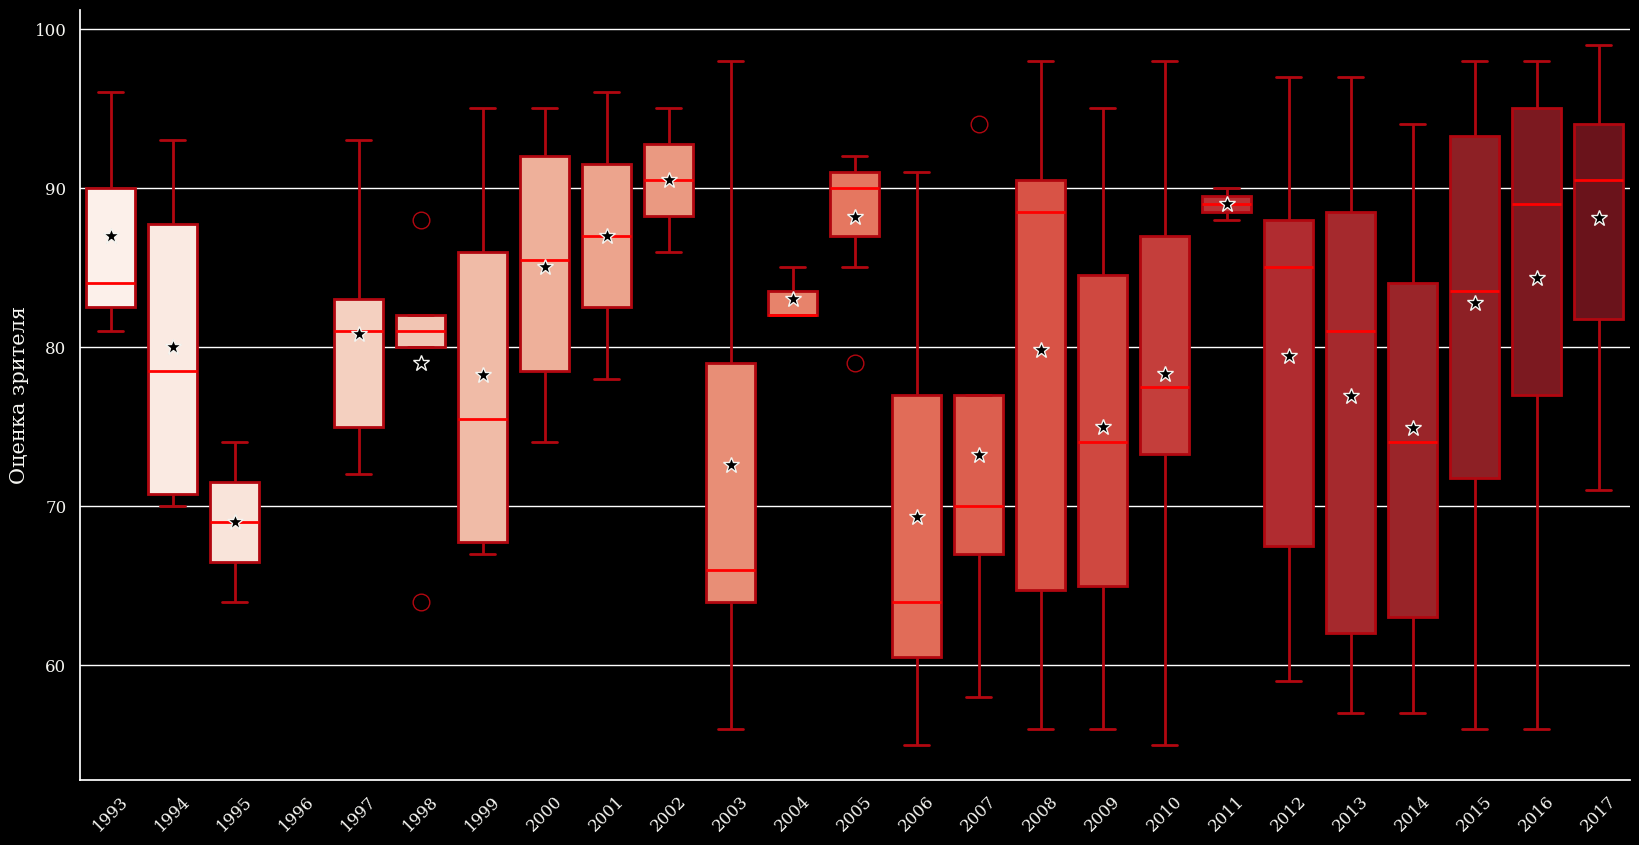

In [ ]:
fig, axes = plt.subplots(1, figsize=(20, 10))#, gridspec_kw={'height_ratios': [6, 1]})

for s in ['top', 'right']:
    axes.spines[s].set_visible(False)

axes = sns.boxplot(x = df1993['release year'], y = df1993['user rating score'], ax=axes, palette='Reds', linewidth=2,
                 medianprops=dict(color='red'),  # цвет линии медианы
                 whiskerprops=dict(color='#b20710'),  # цвет усов
                 capprops=dict(color='#b20710'), # цвет концов усов
                 flierprops=flierprops, # цвет выбросов
                 linecolor='#b20710', meanprops=dict(markerfacecolor='black', markeredgecolor='#f5f5f1', marker='*', markersize=12),
                 showmeans=True)  # цвет контура ящика с усами
axes.set_ylabel('Оценка зрителя', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
axes.set_xlabel('', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.xticks(fontsize=16, fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontsize=12, fontweight='light', fontfamily='serif', color='#f5f5f1')
axes.tick_params(axis = 'x', rotation=45, colors='#f5f5f1',
              labelsize = 12, grid_alpha=0.5)

fig.savefig('count_of_rating_score_per_year.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
fig.show();

**Поскольку до 1993 года в данном наборе есть только единичные оценки фильмов, было решено взять только статистики значимую часть для анализа оценок зрителей по годам. На графике видно, что наблюдается высокая  волатильность оценок зрителей из года в год. Нам показалось интересным разобрать более подробно «просадки» медиан в период с 2005 по 2017.**

In [ ]:
pg_13 = df[df['rating']=='PG-13']
pg_13

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
250,The Waterboy,PG-13,language and some crude sexual humor,1998,82.0
251,10 Things I Hate About You,PG-13,"adult content, adult language and mild violence",1999,68.0
253,How to Lose a Guy in 10 Days,PG-13,some sex-related material,2003,56.0
254,The Benchwarmers,PG-13,"crude and suggestive humor, and for language",2006,77.0
255,Step Up,PG-13,"thematic elements, brief violence and innuendo",2006,64.0
257,Twilight,PG-13,some violence and one sexual scene,2008,89.0
273,Mean Girls 2,PG-13,"For some rude and suggestive material, and for...",2011,NaN
286,Safe Haven,PG-13,thematic material involving threatening behavi...,2013,62.0
302,The Wedding Planner,PG-13,language and some sexual humor,2001,NaN


In [ ]:
pg_13.describe()

,release year,user rating score
count,12.000000,9.000000
mean,2006.083333,71.444444
std,5.230302,11.337009
min,1998.000000,56.000000
25%,2002.500000,63.000000
50%,2006.000000,68.000000
75%,2011.250000,82.000000
max,2013.000000,89.000000


In [ ]:
r = df[df['rating']=='R']
r

,title,rating,ratingLevel,release year,user rating score
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
14,The Hunter,R,language and brief violence,2011,NaN
35,Hyena Road,R,"bloody war violence, language throughout and s...",2015,NaN
87,Meet the Blacks,R,"pervasive language, some sexual material, viol...",2016,79.0
90,Sausage Party,R,"strong crude sexual content, pervasive languag...",2016,91.0
92,Kevin Hart: What Now?,R,"some sexual material, and language throughout",2016,97.0
100,The Life Aquatic with Steve Zissou,R,"language, some drug use, violence and partial ...",2004,NaN
117,5 to 7,R,some sexual material,2014,NaN
150,The Brothers,R,strong sexual content and language,2001,NaN
170,Dope,R,"language, drug content, sexuality/nudity, and ...",2015,79.0


In [ ]:
r.describe()

,release year,user rating score
count,14.000000,7.000000
mean,2011.214286,85.285714
std,5.713393,8.994707
min,2001.000000,77.000000
25%,2007.250000,78.500000
50%,2014.000000,79.000000
75%,2015.750000,93.500000
max,2016.000000,97.000000


In [ ]:
tv_14 = df[df['rating']=='TV-14']
tv_14

,title,rating,ratingLevel,release year,user rating score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
...,...,...,...,...,...
465,Blue Bloods,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
475,Forensic Files,TV-14,Parents strongly cautioned. May be unsuitable ...,2011,88.0
479,Rectify,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
485,American Crime,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN


In [ ]:
tv_14.describe()

,release year,user rating score
count,106.000000,77.000000
mean,2014.283019,82.870130
std,2.800526,12.324933
min,2003.000000,58.000000
25%,2013.000000,73.000000
50%,2016.000000,86.000000
75%,2016.000000,93.000000
max,2017.000000,98.000000


In [ ]:
tv_pg = df[df['rating']=='TV-PG']
tv_pg

,title,rating,ratingLevel,release year,user rating score
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
13,Naruto,TV-PG,Parental guidance suggested. May not be suitab...,2008,88.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
60,Glee,TV-PG,Parental guidance suggested. May not be suitab...,2015,92.0
98,Cheer Squad,TV-PG,NaN,2016,61.0
131,The Great British Baking Show,TV-PG,Parental guidance suggested. May not be suitab...,2016,94.0
137,Minimalism: A Documentary About the Important ...,TV-PG,NaN,2016,NaN
145,MerlÌ?,TV-PG,Parental guidance suggested. May not be suitab...,2015,NaN
204,Drop Dead Diva,TV-PG,Parental guidance suggested. May not be suitab...,2014,NaN


In [ ]:
tv_pg.describe()

,release year,user rating score
count,33.000000,21.000000
mean,2013.000000,83.809524
std,3.041381,13.246203
min,2005.000000,55.000000
25%,2011.000000,81.000000
50%,2014.000000,88.000000
75%,2015.000000,93.000000
max,2017.000000,98.000000


In [ ]:
tv_ma = df[df['rating']=='TV-MA']
tv_ma

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,2016,80.0
21,"ÌÒ Pai, ÌÒ - Look at This",TV-MA,For mature audiences. May not be suitable for...,2007,NaN
24,Marvel's Luke Cage,TV-MA,For mature audiences. May not be suitable for...,2016,95.0
...,...,...,...,...,...
442,Hap and Leonard,TV-MA,NaN,2016,57.0
446,Travelers,TV-MA,For mature audiences. May not be suitable for...,2016,86.0
447,The Doctor Blake Mysteries,TV-MA,For mature audiences. May not be suitable for...,2016,57.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN


In [ ]:
tv_ma.describe()

,release year,user rating score
count,82.000000,40.000000
mean,2015.609756,84.825000
std,1.769118,12.775954
min,2007.000000,56.000000
25%,2015.250000,80.000000
50%,2016.000000,89.000000
75%,2017.000000,95.000000
max,2017.000000,99.000000


In [ ]:
tv_y = df[df['rating']=='TV-Y']
tv_y

,title,rating,ratingLevel,release year,user rating score
15,Lottie Dottie Chicken,TV-Y,Suitable for all ages.,2009,NaN
20,Masha and the Bear,TV-Y,Suitable for all ages.,2013,81.0
508,Thomas & Friends: Thomas & the Runaway Kite,TV-Y,Suitable for all ages.,2010,NaN
511,LeapFrog: The Amazing Alphabet Amusement Park,TV-Y,Suitable for all ages.,2010,NaN
523,The Adventures of Chuck & Friends,TV-Y,Suitable for all ages.,2011,NaN
530,VeggieTales in the House,TV-Y,Suitable for all ages.,2016,NaN
545,The Furchester Hotel,TV-Y,Suitable for all ages.,2015,NaN
559,The Cat in the Hat Knows a Lot About That!,TV-Y,Suitable for all ages.,2014,NaN
561,Bob the Builder,TV-Y,Suitable for all ages.,2015,NaN
572,PokÌ©mon: Indigo League,TV-Y,Suitable for all ages.,2000,74.0


In [ ]:
tv_y.describe()

,release year,user rating score
count,36.000000,8.000000
mean,2011.000000,75.000000
std,5.752018,6.141196
min,1993.000000,67.000000
25%,2009.000000,69.500000
50%,2013.000000,75.500000
75%,2015.000000,81.000000
max,2016.000000,82.000000


In [ ]:
nr = df[df['rating']=='NR']
nr

,title,rating,ratingLevel,release year,user rating score
19,The 100,NR,This movie has not been rated.,2016,97.0
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,2013,NaN
23,Hunter X Hunter (2011),NR,This movie has not been rated.,2013,57.0
37,"Sex, Love and Therapy",NR,This movie has not been rated.,2014,NaN
46,Stronger Than the World,NR,NaN,2016,NaN
47,Back and Forth,NR,This movie has not been rated.,2016,NaN
149,Almost Adults,NR,This movie has not been rated.,2016,NaN
191,Honeytrap,NR,This movie has not been rated.,2014,NaN
194,Like Cotton Twines,NR,NaN,2016,NaN
448,I.T,NR,NaN,2016,NaN


In [ ]:
nr.describe()

,release year,user rating score
count,10.000000,2.000000
mean,2015.000000,77.000000
std,1.333333,28.284271
min,2013.000000,57.000000
25%,2014.000000,67.000000
50%,2016.000000,77.000000
75%,2016.000000,87.000000
max,2016.000000,97.000000


In [ ]:
tv_y7_fv = df[df['rating']=='TV-Y7-FV']
tv_y7_fv

,title,rating,ratingLevel,release year,user rating score
33,Trollhunters,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2016,83.0
515,Justice League,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2003,66.0
516,Justice League Unlimited,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2005,NaN
517,Mighty Morphin Power Rangers,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2010,73.0
520,Power Rangers Zeo,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,1996,NaN
522,Transformers Prime,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2013,NaN
526,LEGO: Marvel Super Heroes: Maximum Overload,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2013,NaN
527,Max Steel,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2014,NaN
528,Transformers Prime Beast Hunters: Predacons Ri...,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2013,NaN
532,All Hail King Julien,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2016,71.0


In [ ]:
tv_y7_fv.describe()

,release year,user rating score
count,25.000000,8.000000
mean,2012.280000,72.750000
std,6.017475,10.194536
min,1996.000000,56.000000
25%,2011.000000,66.750000
50%,2015.000000,72.000000
75%,2016.000000,79.250000
max,2017.000000,88.000000


In [ ]:
pg = df[df['rating']=='PG']
pg

,title,rating,ratingLevel,release year,user rating score
86,Zootopia,PG,"some thematic elements, rude humor and action",2016,97.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
91,Pete's Dragon,PG,"for action, peril and brief language",2016,93.0
180,Kubo and the Two Strings,PG,"thematic elements, scary images, action and peril",2016,96.0
184,Queen of Katwe,PG,"thematic elements, an accident scene and some ...",2016,NaN
...,...,...,...,...,...
976,Air Buddies,PG,"some mild, rude humor",2006,NaN
977,Dr. Dolittle: Tail to the Chief,PG,brief mild language and some rude behavior,2008,NaN
978,Flicka 2,PG,some reckless behavior,2010,NaN
981,Dolphin Tale,PG,some mild thematic elements,2011,NaN


In [ ]:
pg.describe()

,release year,user rating score
count,76.000000,48.000000
mean,2007.065789,84.104167
std,9.375622,11.164609
min,1978.000000,57.000000
25%,2000.750000,74.750000
50%,2010.500000,86.000000
75%,2015.000000,93.250000
max,2016.000000,98.000000


In [ ]:
tv_g = df[df['rating']=='TV-G']
tv_g

,title,rating,ratingLevel,release year,user rating score
256,High School Musical 2,TV-G,Suitable for all ages.,2007,58.0
262,StarStruck,TV-G,Suitable for all ages.,2010,NaN
292,Fuller House,TV-G,Suitable for all ages.,2016,90.0
304,High School Musical,TV-G,Suitable for all ages.,2006,64.0
510,Cars Toons: Mater's Tall Tales,TV-G,Suitable for all ages.,2010,74.0
513,Phineas and Ferb,TV-G,Suitable for all ages.,2012,89.0
521,Oscar's Oasis,TV-G,Suitable for all ages.,2011,NaN
525,Thomas & Friends: King of the Railway,TV-G,Suitable for all ages.,2013,NaN
531,Thunder and the House Of Magic,TV-G,Suitable for all ages.,2013,NaN
547,Angry Birds,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
tv_g.describe()

,release year,user rating score
count,29.000000,11.000000
mean,2011.586207,74.363636
std,4.153460,13.002098
min,1998.000000,58.000000
25%,2010.000000,62.500000
50%,2013.000000,74.000000
75%,2015.000000,86.500000
max,2016.000000,90.000000


In [ ]:
tv_y7 = df[df['rating']=='TV-Y7']
tv_y7

,title,rating,ratingLevel,release year,user rating score
509,Dino Squad,TV-Y7,Suitable for children ages 7 and older,2008,NaN
514,The Batman,TV-Y7,Suitable for children ages 7 and older,2007,77.0
519,The Super Mario Bros. Super Show!,TV-Y7,Suitable for children ages 7 and older,1989,NaN
524,Transformers: Rescue Bots,TV-Y7,Suitable for children ages 7 and older,2016,NaN
538,Lego DC Comics: Batman Be-Leaguered,TV-Y7,Suitable for children ages 7 and older,2014,NaN
540,Power Rangers Dino Charge,TV-Y7,Suitable for children ages 7 and older,2015,NaN
562,Beyblade: Metal Fusion,TV-Y7,Suitable for children ages 7 and older,2009,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
574,Pac-Man and the Ghostly Adventures,TV-Y7,Suitable for children ages 7 and older,2014,NaN
576,Power Rangers Super Megaforce,TV-Y7,Suitable for children ages 7 and older,2014,NaN


In [ ]:
tv_y7.describe()

,release year,user rating score
count,23.000000,6.000000
mean,2010.652174,76.500000
std,8.668693,8.689074
min,1989.000000,65.000000
25%,2008.500000,72.000000
50%,2015.000000,74.500000
75%,2016.000000,83.000000
max,2017.000000,88.000000


In [ ]:
g = df[df['rating']=='G']
g

,title,rating,ratingLevel,release year,user rating score
259,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0
502,Chicken Little,G,General Audiences. Suitable for all ages.,2005,92.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
507,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
551,An Extremely Goofy Movie,G,General Audiences. Suitable for all ages.,1999,67.0
570,Super Buddies,G,General Audiences. Suitable for all ages.,2013,NaN
599,Growing Up Wild,G,NaN,2016,80.0
602,Tarzan,G,General Audiences. Suitable for all ages.,1999,95.0
603,The Emperor's New Groove,G,General Audiences. Suitable for all ages.,2000,95.0
607,The Three Musketeers,G,General Audiences. Suitable for all ages.,2004,NaN


In [ ]:
g.describe()

,release year,user rating score
count,53.000000,19.000000
mean,2000.905660,74.421053
std,12.085058,14.893383
min,1940.000000,55.000000
25%,1998.000000,62.500000
50%,2002.000000,70.000000
75%,2006.000000,88.500000
max,2016.000000,96.000000


In [ ]:
df['rating'].nunique()

13

#КОЛИЧЕСТВО ШОУ ПО ВОЗРАСТНОЙ КАТЕГОРИИ (РЕЙТИНГУ)

/tmp/ipython-input-177-4140975249.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



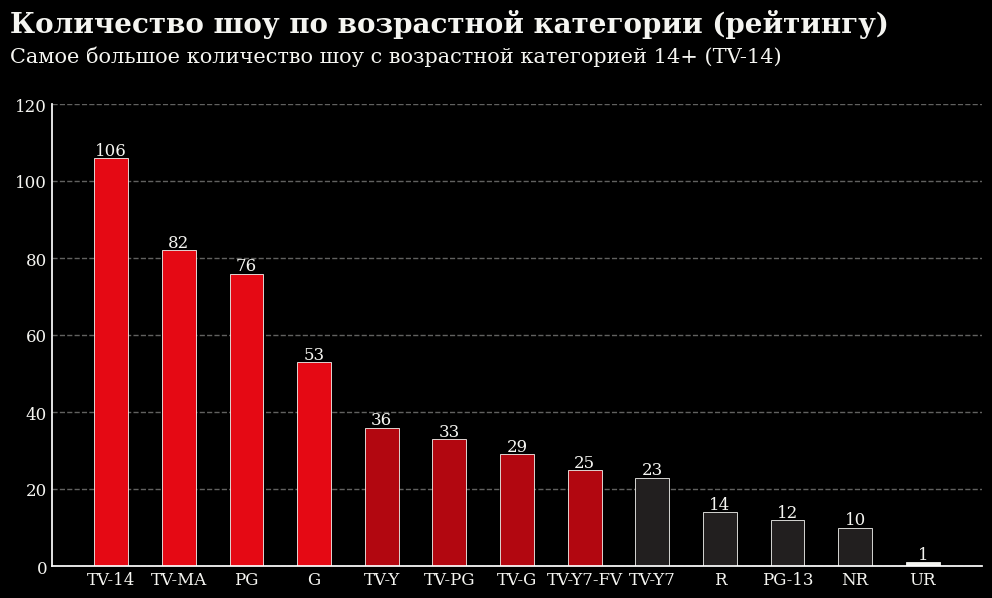

In [ ]:
data = df["rating"].value_counts().sort_values(ascending=False)

# Plot
color_map = ['#e50914','#e50914','#e50914','#e50914','#b20710', '#b20710', '#b20710', '#b20710','#221f1f', '#221f1f', '#221f1f', '#221f1f', '#f5f5f1']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data,
       width=0.5, # ширина столбца
       edgecolor='#f5f5f1', # обводка столбцов
       linewidth=0.6, # толщина обводки
       color=color_map)  # цвета столбцов

#аннотации
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 2), # расположение надписей над столбцами (на сколько пунктов выше)
                   va='center', #расположение надписи
                   ha='center',
                   fontweight='light', # толщина шрифта
                   fontfamily='serif', # шрифт
                   color='#f5f5f1')  # шрифта

# Удалить границу графика
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные

# Риски по оси х
ax.set_xticklabels(data.index, rotation=0) # индексы и поворот меток по оси х

# Заголовок и подзаголовок
fig.text(0.09, 1, 'Количество шоу по возрастной категории (рейтингу)', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.09, 0.95, 'Самое большое количество шоу с возрастной категорией 14+ (TV-14)', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')


ax.grid(axis='y', linestyle='--', alpha=0.4, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='x', color='black')

grid_y_ticks = np.arange(0, 140, 20) # по оси у настраиваем шкалу от 0 до 140 не включительно с шагом 20
ax.set_yticks(grid_y_ticks)  # передаем как аргумент настроенную шкалу по у, чтобы она показалась на графике с помощью set_yticks
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

fig.savefig('count_of_show_by_rating.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

fig.show()

**На графике представлено количество шоу по возрастным категориям, их 13. Самые популярные в датасете шоу -  TV-14, TV-MA, PG и G, поскольку автор извлекал выборку именно по этим категориям.**

---



In [ ]:
df['user rating score'].value_counts()

,count
user rating score,
98.0,12
97.0,12
96.0,12
91.0,11
95.0,11
88.0,9
93.0,9
81.0,9
94.0,8


In [ ]:
df['title'].nunique()

496

А теперь посмотрим по возрастам: G, TV-G – Подходит для всех возрастов.

PG, TV-Y7, TV-Y7-FV, TV-PG – Рекомендуется присутствие родителей (родительское руководство). Обычно подходит для детей от 6 лет.

PG-13, TV-14 – Дети до 13 лет должны смотреть фильм только с родителями или взрослыми. Обычно рекомендуется для подростков старше 12–13 лет.

R, TV-MA – Лицам младше 17 лет требуется сопровождение взрослого. Ориентирован на аудиторию старше 16–17 лет.

NC-17 – Только для взрослых, лицам до 18 лет просмотр запрещен. TV-Y – Подходит для маленьких детей.

NR – Без рейтинга, часто означает, что фильм не был оценён официальной системой рейтингов.

UR – Незаконченный или неизданный материал, который ещё не получил официального рейтинга.

In [ ]:
# Сгруппируем данные по возрастным категориям
shows_all = df[df['rating'].isin(['G', 'TV-G',  'TV-Y7', 'TV-Y7-FV', 'TV-Y'])]
shows_more_than_13 = df[df['rating'].isin(['TV-PG', 'PG', 'PG-13', 'TV-14'])]
shows_more_than_17 = df[df['rating'].isin(['R', 'TV-MA'])]
shows_without_rating = df[df['rating'].isin(['NR', 'UR'])]

In [ ]:
shows_all.nunique()

,0
title,166
rating,5
ratingLevel,4
release year,32
user rating score,31


In [ ]:
shows_more_than_13.nunique()

,0
title,226
rating,4
ratingLevel,78
release year,28
user rating score,38


In [ ]:
shows_more_than_17.nunique()

,0
title,95
rating,2
ratingLevel,15
release year,13
user rating score,25


In [ ]:
shows_without_rating.nunique()

,0
title,11
rating,2
ratingLevel,2
release year,3
user rating score,2


In [ ]:
number_of_years_shows = {0:[],
                         1:[],
                         2:[],
                         3:[]}
k=0
for n in [shows_all,shows_more_than_13, shows_more_than_17, shows_without_rating]:
  for i in np.sort(n['release year'].unique()):
    number_of_years_shows[k].append(n[n['release year'] == i].shape[0])
  k += 1

In [ ]:
number_of_str_tv = list()  # список ТВ-шоу
for i in [shows_all, shows_more_than_13, shows_more_than_17, shows_without_rating]:
  number_of_str_tv.append(i.shape[0])

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{round(pct,1)}% ({val})'
    return my_autopct

#КОЛИЧЕСТВО ШОУ ПО ВОЗРАСТАМ

<Figure size 2200x1800 with 0 Axes>

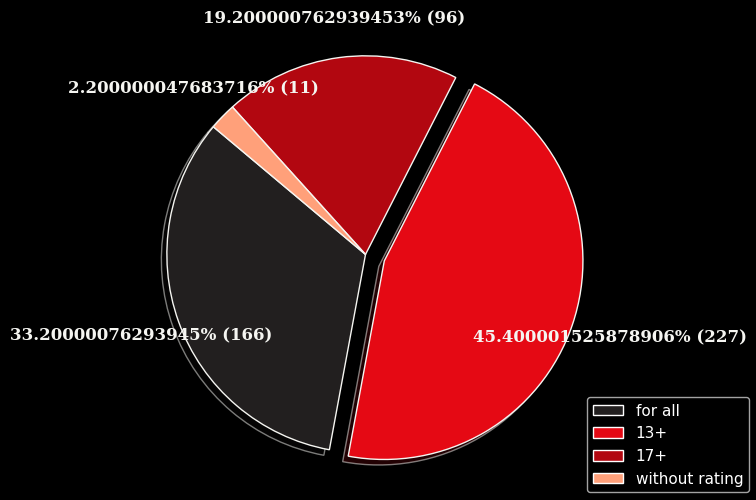

In [ ]:
plt.figure(figsize = (22,18))
labels = ['for all','13+','17+','without rating']
colors = ['#221f1f','#e50914', '#b20710','lightsalmon']
# Устанавливаем черный фон
fig, ax = plt.subplots(facecolor='black')
explode = (0, 0.1, 0, 0)  # Величина выдвигания второго сектора

ax.pie(number_of_str_tv, explode=explode, colors=colors,
        autopct=make_autopct(number_of_str_tv),
        shadow=True,
        startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 12, 'fontweight':'bold', 'fontfamily':'serif', 'color':'#f5f5f1' },
        pctdistance=(1.2))

#plt.title('Title', fontsize=16)
plt.tight_layout()
# add legend
fig.legend(labels=labels, loc='lower right')
#plt.setp(labels, fontsize=15) #update

# Настроим заголовок
#plt.title('Количество контента по категориям', fontsize=15, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.81, 0.28, '(226)', fontsize=10, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.15, 0.28, '(166)', fontsize=10, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.23, 0.75, '(11)', fontsize=10, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#fig.text(0.42, 0.88, '(95)', fontsize=10, fontweight='bold', fontfamily='serif', color='#f5f5f1')

# Изменяем цвет всех элементов графика на белый
for text in ax.texts:
    text.set_color('#f5f5f1')

for patch in ax.patches:
    patch.set_edgecolor('#f5f5f1')

plt.savefig('contant_quantity.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
plt.axis('equal')
# Показываем график
plt.show();


for all: G - для всех возрастов
	   TV-G - для всех возрастов, включая детей
	   TV-Y7- 7 +
	   TV-Y7-FV  - для 7+, возможны  сцены
	   причинения вреда фантастическим персонажам
	   TV-Y - для дошкольного возраста

13+: TV-PG - родители должны следить за содержимым.
	PG – содержит материал, не подходящий для детей
	PG-13 - 13+
	TV-14 - 14+

17+: R - 17+, просмотр со взрослым
	TV-MA - только для взрослых

without rating: NR – без рейтинга
			UR – шоу без	официальной оценки

In [ ]:
df['release year'].nunique()  # количество уникальных лет в датасете

35

In [ ]:
df['release year'].value_counts()

,count
release year,
2016,146
2015,61
2017,37
2014,35
2013,33
2012,27
2011,15
2010,13
2008,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
df1 = df[df['title']== 'Girlboss']
df1

,title,rating,ratingLevel,release year,user rating score
39,Girlboss,TV-MA,NaN,2017,94.0


In [ ]:
df.duplicated(subset=['title']).sum()

np.int64(4)

In [ ]:
df['ratingLevel'].nunique()

99

In [ ]:
df = df.drop(['ratingLevel'], axis=1)  # удалим колонку ratingLevel
df

,title,rating,release year,user rating score
0,White Chicks,PG-13,2004,82.0
1,Lucky Number Slevin,R,2006,NaN
2,Grey's Anatomy,TV-14,2016,98.0
3,Prison Break,TV-14,2008,98.0
4,How I Met Your Mother,TV-PG,2014,94.0
...,...,...,...,...
989,Russell Madness,PG,2015,NaN
993,Wiener Dog Internationals,G,2015,NaN
994,Pup Star,G,2016,NaN
997,Precious Puppies,TV-G,2003,NaN


In [ ]:
data_with_numoftitles_by_year=df.groupby('release year')['title'].count()
data_with_numoftitles_by_year[data_with_numoftitles_by_year>2]

,title
release year,
1993,5
1994,4
1997,9
1998,9
1999,5
2000,7
2001,6
2002,5
2003,11


In [ ]:
data_with_median_rating_byyear=df[
    df['release year'].isin(data_with_numoftitles_by_year[data_with_numoftitles_by_year>26].index)
    ].groupby('release year')['user rating score'].median()
data_with_median_rating_byyear

,user rating score
release year,
2012,85.0
2013,81.0
2014,74.0
2015,83.5
2016,89.0
2017,90.5


#УСЕЧЕННЫЙ АНАЛИЗ ОЦЕНКИ ЗРИТЕЛЕЙ

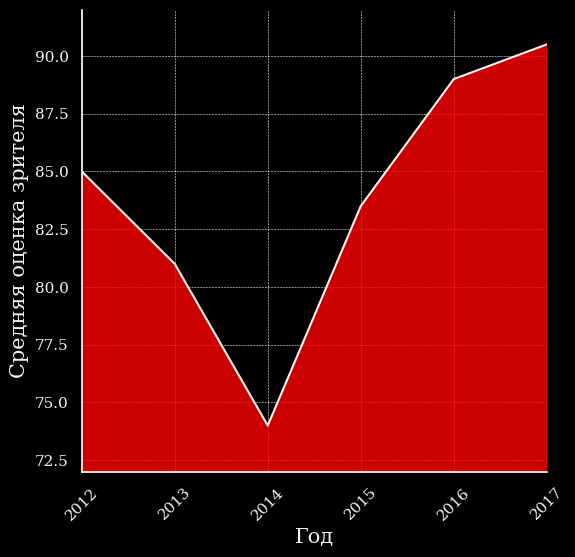

In [ ]:
plt.figure(figsize = (6,6))
plt.plot(data_with_median_rating_byyear.index,data_with_median_rating_byyear, color='#f5f5f1')
plt.xlim(2012, 2017)
plt.xticks(np.arange(2012, 2018, 1),rotation=45)
plt.ylim(72, 92)

# Заливка области под графиком
plt.fill_between(data_with_median_rating_byyear.index, data_with_median_rating_byyear, color='red', alpha=0.8)

# Заголовки и подписи
#plt.title('Средняя оценка', fontsize=20, color='#f5f5f1', size=20, fontweight='bold', fontfamily='serif')
#plt.text(0.09, 1, 'Средняя оценка зрителей', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
#plt.text(0.4, 0.23, '74', fontsize=20, fontweight='bold', fontfamily='serif', color='#f5f5f1')
plt.xlabel('Год', fontsize=15, color='#f5f5f1', fontweight='light', fontfamily='serif')
plt.ylabel('Средняя оценка зрителя', fontsize=15, color='#f5f5f1', fontweight='light', fontfamily='serif')
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
# Сетка
plt.grid(color='#f5f5f1', linestyle='--', linewidth=0.4)

# Настройка осей
ax = plt.gca()

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные
# Установка цвета осей и меток
ax.spines['bottom'].set_color('#f5f5f1')
ax.spines['left'].set_color('#f5f5f1')

ax.tick_params(axis='x', colors='#f5f5f1')
ax.tick_params(axis='y', colors='#f5f5f1')

plt.savefig('user_score_for_film.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
plt.show();

**На графике показаны годы, количество уникальных шоу в которых превышает 30 наименований. Заметно стабильное снижение среднего (медианного значения) рейтинга зрителей до 2014 года.
Выяснилось, что период с 2011-2014 характеризуется мировым кризисом. Необходимо отметить и кризис внутри самой компании: снижение роста новых пользователей, повышение цен на свои услуги (в кУпе с мировым кризисом было встречено крайне негативно), снижение цены акций нетфликс на фондовом рынке, также были активны конкуренты в лице Amazon Prime Video и Hulu. Все эти факторы предположительно могут свидетельствовать об увеличении дефицита бюджета компании.  
Можно выдвинуть гипотезу о том, что просадка средних оценок в эти года может быть связана с тем, что для нетфликса стало проблематично приобретать лицензии на популярные тайтлы (шоу). Ставка компании на выпуск оригинального контента (старт в 2013 году с шоу «Карточный домик») помогла нетфликс выбраться из финансовой ямы. В целом, после начала новой политики и окончания мирового кризиса заметна положительная динамика средних оценок пользователей.**


In [ ]:
df['Films'] = df['rating'].apply(lambda x: True if x in ['G','PG', 'R', 'NC-17','PG-13'] else False)
df['TVShows'] = df['rating'].apply(lambda x: True if x in ['TV-14', 'TV-PG', 'TV-MA', 'TV-Y','TV-Y7-FV','TV-G','TV-Y7'] else False)
df['WithoutRating'] = df['rating'].apply(lambda x: True if x in ['NR','UR'] else False)

In [ ]:
tv_shows = df[df['TVShows'] == True]
films = df[df['Films'] == True]

In [ ]:
number_of_years_films = list()
for i in np.sort(films['release year'].unique()):
  number_of_years_films.append(films[films['release year'] == i].shape[0])
number_of_years_tvshows = list()
for i in np.sort(tv_shows['release year'].unique()):
  number_of_years_tvshows.append(tv_shows[tv_shows['release year'] == i].shape[0])

In [ ]:
from matplotlib.font_manager import FontProperties

#КОЛИЧЕСТВО ВЫПУСКАЕМЫХ ШОУ И ФИЛЬМОВ ПО ГОДА

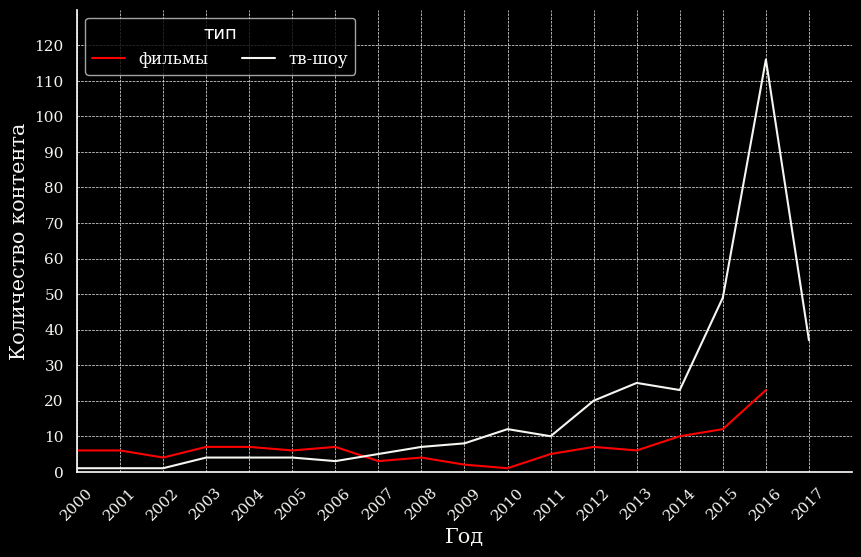

In [ ]:

plt.figure(figsize = (10, 6))
plt.subplot(1, 1, 1)
plt.plot(np.sort(films['release year'].unique()),number_of_years_films,label = 'фильмы', color='red')
plt.plot(np.sort(tv_shows['release year'].unique()),number_of_years_tvshows,label = 'тв-шоу', color='#f5f5f1')
plt.xlim(2000, 2018)
plt.xticks(np.arange(2000, 2018, 1),rotation=45)
plt.ylim(0, 130)
plt.yticks(np.arange(0, 130, 10))
#plt.title('Количество выпускаемого контента', fontsize=15, color='#f5f5f1', fontweight='light', fontfamily='serif')
plt.xlabel('Год', fontsize=15, color='#f5f5f1', fontweight='light', fontfamily='serif')
plt.ylabel('Количество контента', fontsize=15, color='#f5f5f1', fontweight='light', fontfamily='serif')
plt.legend(title='тип', title_fontsize=13, fontsize=12, ncol=2, loc='upper left',
           prop=FontProperties(size=12, family='serif'))

plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')

# Сетка
plt.grid(color='#f5f5f1', linestyle='--', linewidth=0.5)
# Настройка осей
ax = plt.gca()

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные
# Установка цвета осей и меток
ax.spines['bottom'].set_color('#f5f5f1')
ax.spines['left'].set_color('#f5f5f1')

ax.tick_params(axis='x', colors='#f5f5f1')
ax.tick_params(axis='y', colors='#f5f5f1')

plt.savefig('tv_shows.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )


**Чтобы подробнее изучить наш набор данных, мы решили добавить новый признак, который бы составил разделение на шоу и кинокартины. На графике можно проследить, что тенденция производителей контента рейтинговаться в MPAA (агентство, которое рейтингует шоу) сменилась в сторону FFC (агентство, которое рейтингует тв-шоу). К 2007 году шоу и фильмов, получивших рейтинг с приставкой "TV" стало больше, чем рейтингов от ассоциации кинофильмов
Необходимо отметить, что до 2007 года нетфликс развивался, как сервис проката DVD-дисков. После это года нетфликс занялся стриминговой деятельностью, направленной на телевизионную аудиторию. С развитием Нетфликс и других стриминговых сервисов, таких как Hulu и Amazon Prime Video, многие производители контента стали ориентироваться именно на телевизионные рейтинги, так как они позволяют легче адаптировать контент для разных платформ.   
С ростом популярности названных компаний все большее число контента выпускалось под рейтингом FFC.  
Тем не менее, MPAA рейтинги никуда не ушли, поскольку спрос на кинофильмы, кинотеатры никуда не исчез.**


Новые датасеты были взять с реппозитория GitHub

In [ ]:
# Путь к датасету
imdb_ac= 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_action.csv'

In [ ]:
imdb_action = pd.read_csv(imdb_ac)
imdb_action.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0


In [ ]:
imdb_com= 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_comedy.csv'

In [ ]:
imdb_comedy = pd.read_csv(imdb_com)
imdb_comedy.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Wolf of Wall Street,(2013),180 min,Biography - Comedy - Crime,8.2,"$100,000,000","116,900,694",1457411,75.0
1,2.,Back to the Future,(1985),116 min,Adventure - Comedy - Sci-Fi,8.5,"$19,000,000","210,609,762",1234788,87.0
2,3.,Guardians of the Galaxy,(2014),121 min,Action - Adventure - Comedy,8.0,"$170,000,000","333,176,600",1207719,76.0
3,4.,The Truman Show,(1998),103 min,Comedy - Drama,8.2,"$60,000,000","125,618,201",1113387,90.0
4,5.,Up,(2009),96 min,Animation - Adventure - Comedy,8.3,"$175,000,000","293,004,164",1066483,88.0


In [ ]:
imdb_cr= 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_crime.csv'

In [ ]:
imdb_crime = pd.read_csv(imdb_cr)
imdb_crime.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.0,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710342,84.0
1,2.0,Pulp Fiction,(1994),154 min,Crime - Drama,8.9,"$8,000,000","107,928,762",2103494,95.0
2,3.0,The Godfather,(1972),175 min,Crime - Drama,9.2,"$6,000,000","134,966,411",1903506,100.0
3,4.0,Se7en,(1995),127 min,Crime - Drama - Mystery,8.6,"$33,000,000","100,125,643",1692365,65.0
4,5.0,Batman Begins,(2005),140 min,Action - Crime - Drama,8.2,"$150,000,000","206,852,432",1499377,70.0


In [ ]:
imdb_dr= 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_drama.csv'

In [ ]:
imdb_drama = pd.read_csv(imdb_dr)
imdb_drama.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,Avengers: Endgame,(2019),181 min,Action - Adventure - Drama,8.4,"$356,000,000","858,373,000",1174238,78.0
1,2.,Top Gun: Maverick,(2022),130 min,Action - Drama,8.3,"$170,000,000","718,732,821",581173,78.0
2,3.,Titanic,(1997),194 min,Drama - Romance,7.9,"$200,000,000","659,325,379",1216761,75.0
3,4.,The Lion King,(2019),118 min,Animation - Adventure - Drama,6.8,"$260,000,000","543,638,043",253081,55.0
4,5.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710664,84.0


In [ ]:
imdb_hor= 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_horror.csv'

In [ ]:
imdb_horror = pd.read_csv(imdb_hor)
imdb_horror.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Shining,(1980),146 min,Drama - Horror,8.4,"$19,000,000","44,017,374",1046194,66.0
1,2.,Alien,(1979),117 min,Horror - Sci-Fi,8.5,"$11,000,000","78,900,000",901097,89.0
2,3.,I Am Legend,(2007),101 min,Action - Drama - Horror,7.2,"$150,000,000","256,386,216",778116,65.0
3,4.,World War Z,(2013),116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685918,63.0
4,5.,Psycho,(1960),109 min,Horror - Mystery - Thriller,8.5,"$806,947","32,000,000",685911,97.0


In [ ]:
imdb_sci = 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_scifi.csv'

In [ ]:
imdb_scifi = pd.read_csv(imdb_sci)
imdb_scifi.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.0,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74
1,2.0,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73
2,3.0,Interstellar,(2014),169 min,Adventure - Drama - Sci-Fi,8.6,"$165,000,000","188,020,017",1901186,74
3,4.0,The Avengers,(2012),143 min,Action - Sci-Fi,8.0,"$220,000,000","623,279,547",1412844,69
4,5.0,Star Wars: Episode IV - A New Hope,(1977),121 min,Action - Adventure - Fantasy,8.6,"$11,000,000","322,740,140",1390125,90


In [ ]:
imdb_thr = 'https://raw.githubusercontent.com/MamiMrl/IMDb-Movie-Scraping-for-Team-Netflix-Recommendation/main/Scraped_datasets/imdb_scraped_data_thriller.csv'

In [ ]:
imdb_thriller = pd.read_csv(imdb_thr)
imdb_thriller.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710365,84.0
1,2.,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405966,74.0
2,3.,The Dark Knight Rises,(2012),164 min,Action - Drama - Thriller,8.4,"$250,000,000","448,139,099",1737288,78.0
3,4.,Se7en,(1995),127 min,Crime - Drama - Mystery,8.6,"$33,000,000","100,125,643",1692377,65.0
4,5.,The Silence of the Lambs,(1991),118 min,Crime - Drama - Thriller,8.6,"$19,000,000","130,742,922",1463604,86.0


In [ ]:
imdb_data = pd.concat([imdb_action, imdb_comedy, imdb_crime, imdb_drama, imdb_horror, imdb_scifi, imdb_thriller])

In [ ]:
imdb_data

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
2995,"2,996.",The Bad Sleep Well,(1960),151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
2996,"2,997.",Vavien,(2009),100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
2997,"2,998.",When a Stranger Calls,(1979),97 min,Horror - Mystery - Thriller,6.4,"$1,500,000","21,411,158",13196,58.0
2998,"2,999.",The Quake,(2018),106 min,Action - Drama - Thriller,6.2,"NOK 52,100,000","6,235",13179,70.0


In [ ]:
imdb_data = imdb_data.drop_duplicates()

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             12980 non-null  object 
 1   Title              12980 non-null  object 
 2   Year               12980 non-null  object 
 3   Runtime            12979 non-null  object 
 4   Genre              12980 non-null  object 
 5   Rating             12980 non-null  float64
 6   Budget             10490 non-null  object 
 7   Gross US & Canada  10413 non-null  object 
 8   Votes              12980 non-null  int64  
 9   Metascore          10946 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
imdb_data['Year'] = imdb_data['Year'].str.replace('(', '').str.replace(')', '')

In [ ]:
imdb_data

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
2995,"2,996.",The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
2996,"2,997.",Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
2997,"2,998.",When a Stranger Calls,1979,97 min,Horror - Mystery - Thriller,6.4,"$1,500,000","21,411,158",13196,58.0
2998,"2,999.",The Quake,2018,106 min,Action - Drama - Thriller,6.2,"NOK 52,100,000","6,235",13179,70.0


In [ ]:
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '')

In [ ]:
imdb_data['Runtime'] = imdb_data['Runtime'].astype(float)

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             12980 non-null  object 
 1   Title              12980 non-null  object 
 2   Year               12980 non-null  object 
 3   Runtime            12979 non-null  float64
 4   Genre              12980 non-null  object 
 5   Rating             12980 non-null  float64
 6   Budget             10490 non-null  object 
 7   Gross US & Canada  10413 non-null  object 
 8   Votes              12980 non-null  int64  
 9   Metascore          10946 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
imdb_data['Year'] = imdb_data['Year'].str.replace('I', '').str.replace('V', '').str.replace(' ', '').str.replace('X', '')

In [ ]:
imdb_data['Year'] = imdb_data['Year'].astype(int)

In [ ]:
imdb_data = imdb_data[imdb_data['Year'] <  2018]

In [ ]:
imdb_data.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,2008,152.0,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,2010,148.0,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,1999,136.0,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,2003,201.0,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0


In [ ]:
imdb_data.head()

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,2008,152.0,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,2010,148.0,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,1999,136.0,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,2003,201.0,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0


In [ ]:
imdb_data = imdb_data.drop(['Number'], axis=1)

In [ ]:
imdb_data = imdb_data.drop_duplicates()

In [ ]:
imdb_data

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152.0,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148.0,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136.0,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201.0,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
2991,Beyond a Reasonable Doubt,2009,106.0,Crime - Drama - Mystery,5.8,"$25,000,000","32,409",13271,35.0
2992,Roja,1992,137.0,Drama - Romance - Thriller,8.1,NaN,NaN,13250,NaN
2995,The Bad Sleep Well,1960,151.0,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
2996,Vavien,2009,100.0,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN


In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10134 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10134 non-null  object 
 1   Year               10134 non-null  int64  
 2   Runtime            10133 non-null  float64
 3   Genre              10134 non-null  object 
 4   Rating             10134 non-null  float64
 5   Budget             8558 non-null   object 
 6   Gross US & Canada  8820 non-null   object 
 7   Votes              10134 non-null  int64  
 8   Metascore          8630 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 791.7+ KB


In [ ]:
imdb_data = imdb_data.drop_duplicates(subset=['Title', 'Year', 'Runtime'])

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              6983 non-null   object 
 1   Year               6983 non-null   int64  
 2   Runtime            6982 non-null   float64
 3   Genre              6983 non-null   object 
 4   Rating             6983 non-null   float64
 5   Budget             5683 non-null   object 
 6   Gross US & Canada  5899 non-null   object 
 7   Votes              6983 non-null   int64  
 8   Metascore          5720 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 545.5+ KB


In [ ]:
imdb_data.Title.value_counts().head(30)

,count
Title,
The Mummy,4
The Three Musketeers,3
Dracula,3
King Kong,3
Inferno,3
Godzilla,3
Fearless,2
Drishyam,2
The Postman Always Rings Twice,2


In [ ]:
imdb_data[imdb_data['Title'] == 'My Bloody Valentine']

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
427,My Bloody Valentine,2009,101.0,Horror - Mystery - Thriller,5.4,"$15,000,000","51,545,952",58435,51.0
863,My Bloody Valentine,1981,90.0,Horror - Mystery - Thriller,6.2,"CA$2,300,000","5,672,031",23445,46.0


In [ ]:
df

,title,rating,release year,user rating score,Films,TVShows,WithoutRating
0,White Chicks,PG-13,2004,82.0,True,False,False
1,Lucky Number Slevin,R,2006,NaN,True,False,False
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False
3,Prison Break,TV-14,2008,98.0,False,True,False
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False
...,...,...,...,...,...,...,...
989,Russell Madness,PG,2015,NaN,True,False,False
993,Wiener Dog Internationals,G,2015,NaN,True,False,False
994,Pup Star,G,2016,NaN,True,False,False
997,Precious Puppies,TV-G,2003,NaN,False,True,False


In [ ]:
imdb_data = imdb_data.rename(columns={'Year': 'release year', 'Title':'title'})  # переименуем признаки

In [ ]:
merged_df = pd.merge(df, imdb_data, on=['title','release year'], how='left')  # присоединим лвым join к первому датасету полученный датасет
merged_df

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,"$37,000,000","70,831,760",152509.0,41.0
1,Lucky Number Slevin,R,2006,NaN,True,False,False,110.0,Crime - Drama - Thriller,7.7,"$27,000,000","22,494,487",318604.0,53.0
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   release year       500 non-null    int64  
 3   user rating score  256 non-null    float64
 4   Films              500 non-null    bool   
 5   TVShows            500 non-null    bool   
 6   WithoutRating      500 non-null    bool   
 7   Runtime            80 non-null     float64
 8   Genre              80 non-null     object 
 9   Rating             80 non-null     float64
 10  Budget             71 non-null     object 
 11  Gross US & Canada  76 non-null     object 
 12  Votes              80 non-null     float64
 13  Metascore          74 non-null     float64
dtypes: bool(3), float64(5), int64(1), object(5)
memory usage: 44.6+ KB


In [ ]:
merged_df['user rating score'] = merged_df['user rating score'].fillna(0)

In [ ]:
merged_df

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,"$37,000,000","70,831,760",152509.0,41.0
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,"$27,000,000","22,494,487",318604.0,53.0
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Путь к датасету
dt10000= 'https://raw.githubusercontent.com/gm-oo9/Movies-IMDB-10-000-Data-WebScraping-1915-2023/main/data.csv'

In [ ]:
data_10000 = pd.read_csv(dt10000)

In [ ]:
data_10000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [ ]:
data_10000.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [ ]:
data_10000['Genre'] = data_10000['Genre'].str.replace("['", '').str.replace("']", '').str.replace("'", '')

In [ ]:
data_10000['Director'] = data_10000['Director'].str.replace("['", '').str.replace("']", '').str.replace("'", '')

In [ ]:
data_10000['Stars'] = data_10000['Stars'].str.replace("['", '').str.replace("']", '').str.replace("'", '').str.replace('"', '')

In [ ]:
data_10000['Description'] = data_10000['Description'].str.replace("['", '').str.replace("']", '').str.replace("'", '').str.replace('"', '').str.replace(',,', '')

In [ ]:
data_10000

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over, the, course, of, several, years two, con..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"Crime, Drama",R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don, Vito, Corleone head, of, a, mafia, family..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"Animation, Action, Adventure",PG,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","An, anime, adaptation, of, the, Hindu, epic, t..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"Comedy, Drama",NaN,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy uneducated, students, share, a, very, clo..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"Action, Crime, Drama",PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","When, the, menace, known, as, the, Joker, wrea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"Action, Comedy, Fantasy",Not Rated,Rohit Shetty,"Ajay Devgn, Arshad Warsi, Tabu, Shreyas Talpade","The, gang, encounters, with, some, spiritual, ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,Drama,NaN,Valerio Zanoli,"Karen Grassle, Louis Gossett Jr., Tatum ONeal,...","After, a, lifetime, of, scams a, self-centered..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"Action, Comedy, Romance",Not Rated,"Sajid, Farhad Samji","Akshay Kumar, Abhishek Bachchan, Riteish Deshm...","A, father, doesnt, want, his, three, daughters..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"Drama, Romance, Sci-Fi",R,Lazar Bodroza,"Sebastian Cavazza, Stoya, Marusa Majer, Kirsty...","An, intimate, relationship, between, a, human,..."


In [ ]:
data_10000 = data_10000.drop(['Unnamed: 0'], axis=1)  # удаляем лишний признак
data_10000

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over, the, course, of, several, years two, con..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"Crime, Drama",R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don, Vito, Corleone head, of, a, mafia, family..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"Animation, Action, Adventure",PG,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","An, anime, adaptation, of, the, Hindu, epic, t..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"Comedy, Drama",NaN,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy uneducated, students, share, a, very, clo..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"Action, Crime, Drama",PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","When, the, menace, known, as, the, Joker, wrea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"Action, Comedy, Fantasy",Not Rated,Rohit Shetty,"Ajay Devgn, Arshad Warsi, Tabu, Shreyas Talpade","The, gang, encounters, with, some, spiritual, ..."
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,Drama,NaN,Valerio Zanoli,"Karen Grassle, Louis Gossett Jr., Tatum ONeal,...","After, a, lifetime, of, scams a, self-centered..."
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"Action, Comedy, Romance",Not Rated,"Sajid, Farhad Samji","Akshay Kumar, Abhishek Bachchan, Riteish Deshm...","A, father, doesnt, want, his, three, daughters..."
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"Drama, Romance, Sci-Fi",R,Lazar Bodroza,"Sebastian Cavazza, Stoya, Marusa Majer, Kirsty...","An, intimate, relationship, between, a, human,..."


In [ ]:
data_10000 = data_10000.rename(columns={'Year of Release': 'release year', 'Movie Name': 'title'})  # Переименовываем признаки
data_10000

,title,release year,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over, the, course, of, several, years two, con..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"Crime, Drama",R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don, Vito, Corleone head, of, a, mafia, family..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"Animation, Action, Adventure",PG,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","An, anime, adaptation, of, the, Hindu, epic, t..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"Comedy, Drama",NaN,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy uneducated, students, share, a, very, clo..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"Action, Crime, Drama",PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","When, the, menace, known, as, the, Joker, wrea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"Action, Comedy, Fantasy",Not Rated,Rohit Shetty,"Ajay Devgn, Arshad Warsi, Tabu, Shreyas Talpade","The, gang, encounters, with, some, spiritual, ..."
9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,Drama,NaN,Valerio Zanoli,"Karen Grassle, Louis Gossett Jr., Tatum ONeal,...","After, a, lifetime, of, scams a, self-centered..."
9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"Action, Comedy, Romance",Not Rated,"Sajid, Farhad Samji","Akshay Kumar, Abhishek Bachchan, Riteish Deshm...","A, father, doesnt, want, his, three, daughters..."
9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"Drama, Romance, Sci-Fi",R,Lazar Bodroza,"Sebastian Cavazza, Stoya, Marusa Majer, Kirsty...","An, intimate, relationship, between, a, human,..."


In [ ]:
data_10000 = data_10000.drop_duplicates()

In [ ]:
data_10000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                10000 non-null  object 
 1   release year         10000 non-null  int64  
 2   Run Time in minutes  10000 non-null  int64  
 3   Movie Rating         10000 non-null  float64
 4   Votes                10000 non-null  int64  
 5   MetaScore            7974 non-null   float64
 6   Gross                7085 non-null   float64
 7   Genre                10000 non-null  object 
 8   Certification        9631 non-null   object 
 9   Director             10000 non-null  object 
 10  Stars                10000 non-null  object 
 11  Description          10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


In [ ]:
merged_data = pd.merge(merged_df, data_10000, on=['title','release year'], how='left')  # присоединяем датасет
merged_data

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,Run Time in minutes,Movie Rating,Votes_y,MetaScore,Gross,Genre_y,Certification,Director,Stars,Description
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,109.0,5.7,157268.0,41.0,70830000.0,"Comedy, Crime",PG-13,Keenen Ivory Wayans,"Marlon Wayans, Shawn Wayans, Busy Philipps, Ma...","Two, disgraced, FBI, agents, go, way, undercov..."
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,110.0,7.7,321486.0,53.0,22490000.0,"Crime, Drama, Thriller",R,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...","A, case, of, mistaken, identity, lands, Slevin..."
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Следующий датасет был взят с kaggle
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores
# Из соображений конфиденциальности API-ключи не будут выкладываться в доступ другим людям
# поэтому данный датасет был скачан из kaggle, а затем выложена на гитхаб
# но ниже представлен код, который позволяет загрузить личный API-ключ и данный с сайта kaggle

In [ ]:
#from google.colab import files
#files.upload()  # загружаем токен из kaggle

In [ ]:
#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import kaggle  # импортируем kaggle
#from kaggle.api.kaggle_api_extended import KaggleApi  # подгружаем Api
#api = KaggleApi()
#api.authenticate()
# указываем путь на kaggle, затем папку, которую создадим в среде, чтобы туда положить zip-файл с датасетом
# api.dataset_download_files('name/dataset_name', 'folder from dataset kaggle (from data explorer)')
#api.dataset_download_files('thedevastator/netflix-imdb-scores', "netflix_tv_shows_and_movies")

In [ ]:
#import zipfile
# Извлечем файл из zip-папки
#path_to_zip_file = 'netflix_tv_shows_and_movies/netflix-imdb-scores.zip'
#with zipfile.ZipFile(path_to_zip_file, 'r') as z:
#    z.extractall('tv')
# данный датасет был добавлен в реппозиторий GitHub одного из участников команды, из него мы и прочтем датасет ниже

In [ ]:
imdb_dt= 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/Netflix%20TV%20Shows%20and%20Movies.csv'

In [ ]:
data_new = pd.read_csv(imdb_dt)
data_new

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [ ]:
data_new = data_new.drop(['index', 'id'], axis=1)

In [ ]:
data_new = data_new.drop_duplicates()
data_new

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [ ]:
data_new = data_new.rename(columns={'release_year': 'release year'})
data_new

,title,type,description,release year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [ ]:
merged_new_data = pd.merge(merged_data, data_new, on=['title','release year'], how='left')
merged_new_data

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,Director,Stars,Description,type,description,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,Keenen Ivory Wayans,"Marlon Wayans, Shawn Wayans, Busy Philipps, Ma...","Two, disgraced, FBI, agents, go, way, undercov...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,Paul McGuigan,"Josh Hartnett, Ben Kingsley, Morgan Freeman, L...","A, case, of, mistaken, identity, lands, Slevin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                500 non-null    object 
 1   rating               500 non-null    object 
 2   release year         500 non-null    int64  
 3   user rating score    500 non-null    float64
 4   Films                500 non-null    bool   
 5   TVShows              500 non-null    bool   
 6   WithoutRating        500 non-null    bool   
 7   Runtime              80 non-null     float64
 8   Genre_x              80 non-null     object 
 9   Rating               80 non-null     float64
 10  Budget               71 non-null     object 
 11  Gross US & Canada    76 non-null     object 
 12  Votes_x              80 non-null     float64
 13  Metascore            74 non-null     float64
 14  Run Time in minutes  93 non-null     float64
 15  Movie Rating         93 non-null     flo

In [ ]:
# Следующий датасет был взят из kaggle: https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney,
# из соображений конфиденциальности, API-ключ не предоставляется, датасет загружен на GitHub

In [ ]:
# files.upload()  # загружаем токен из kaggle

In [ ]:
#api = KaggleApi()
#api.authenticate()
# указываем путь на kaggle, затем папку, которую создадим в среде, чтобы туда положить zip-файл с датасетом
# api.dataset_download_files('name/dataset_name', 'folder from dataset kaggle (from data explorer)')
#api.dataset_download_files('ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney', "tv-shows")

In [ ]:
# Извлечем файл из zip-папки
#path_to_zip_file = 'tv-shows/tv-shows-on-netflix-prime-video-hulu-and-disney.zip'
#with zipfile.ZipFile(path_to_zip_file, 'r') as z:
#    z.extractall('tv')

In [ ]:
# Путь к датасету
tv_sh = 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/tv_shows.csv'

In [ ]:
tv = pd.read_csv(tv_sh)

In [ ]:
tv

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


In [ ]:
tv_netflix = tv[tv['Netflix'] !=0]
tv_netflix

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4701,4701,5017,Human Nature,2013,NaN,NaN,13/100,1,0,1,0,1
5064,5064,5385,The Bad Batch,2021,7+,8.2/10,82/100,1,0,0,1,1
5097,5097,5425,The Muppets,2015,7+,7.4/10,64/100,1,0,0,1,1
5231,5231,5575,Pick of the Litter,2019,7+,8.1/10,47/100,1,1,0,1,1


In [ ]:
tv_until_2017 = tv_netflix[tv_netflix['Year'] < 2018]
tv_until_2017

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3992,4274,Charlie's Angels,2011,16+,4.4/10,44/100,1,0,1,0,1
4075,4075,4361,Into the Wild,2014,NaN,8.5/10,41/100,1,0,1,0,1
4124,4124,4417,Ghost Stories,1997,NaN,6.6/10,39/100,1,1,1,0,1
4701,4701,5017,Human Nature,2013,NaN,NaN,13/100,1,0,1,0,1


In [ ]:
tv_2017 = tv_until_2017.drop(['Hulu','Prime Video', 'Disney+', 'Type','Unnamed: 0', 'ID'], axis=1)
tv_2017

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix
0,Breaking Bad,2008,18+,9.4/10,100/100,1
1,Stranger Things,2016,16+,8.7/10,96/100,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1
3,Better Call Saul,2015,18+,8.8/10,94/100,1
4,Dark,2017,16+,8.8/10,93/100,1
...,...,...,...,...,...,...
3992,Charlie's Angels,2011,16+,4.4/10,44/100,1
4075,Into the Wild,2014,NaN,8.5/10,41/100,1
4124,Ghost Stories,1997,NaN,6.6/10,39/100,1
4701,Human Nature,2013,NaN,NaN,13/100,1


In [ ]:
tv_df = tv_2017.rename(columns={'Year': 'release year'})
tv_df

,Title,release year,Age,IMDb,Rotten Tomatoes,Netflix
0,Breaking Bad,2008,18+,9.4/10,100/100,1
1,Stranger Things,2016,16+,8.7/10,96/100,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1
3,Better Call Saul,2015,18+,8.8/10,94/100,1
4,Dark,2017,16+,8.8/10,93/100,1
...,...,...,...,...,...,...
3992,Charlie's Angels,2011,16+,4.4/10,44/100,1
4075,Into the Wild,2014,NaN,8.5/10,41/100,1
4124,Ghost Stories,1997,NaN,6.6/10,39/100,1
4701,Human Nature,2013,NaN,NaN,13/100,1


In [ ]:
tv_df = tv_df.rename(columns={'Title': 'title'})
tv_df

,title,release year,Age,IMDb,Rotten Tomatoes,Netflix
0,Breaking Bad,2008,18+,9.4/10,100/100,1
1,Stranger Things,2016,16+,8.7/10,96/100,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1
3,Better Call Saul,2015,18+,8.8/10,94/100,1
4,Dark,2017,16+,8.8/10,93/100,1
...,...,...,...,...,...,...
3992,Charlie's Angels,2011,16+,4.4/10,44/100,1
4075,Into the Wild,2014,NaN,8.5/10,41/100,1
4124,Ghost Stories,1997,NaN,6.6/10,39/100,1
4701,Human Nature,2013,NaN,NaN,13/100,1


In [ ]:
tv_df = tv_df.rename(columns={'Year': 'release year'})
tv_df

,title,release year,Age,IMDb,Rotten Tomatoes,Netflix
0,Breaking Bad,2008,18+,9.4/10,100/100,1
1,Stranger Things,2016,16+,8.7/10,96/100,1
2,Attack on Titan,2013,18+,9.0/10,95/100,1
3,Better Call Saul,2015,18+,8.8/10,94/100,1
4,Dark,2017,16+,8.8/10,93/100,1
...,...,...,...,...,...,...
3992,Charlie's Angels,2011,16+,4.4/10,44/100,1
4075,Into the Wild,2014,NaN,8.5/10,41/100,1
4124,Ghost Stories,1997,NaN,6.6/10,39/100,1
4701,Human Nature,2013,NaN,NaN,13/100,1


In [ ]:
merged_sec = pd.merge(merged_new_data, tv_df, on=['title','release year'], how='left')
merged_sec

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,description,age_certification,runtime,imdb_id,imdb_score,imdb_votes,Age,IMDb,Rotten Tomatoes,Netflix
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                500 non-null    object 
 1   rating               500 non-null    object 
 2   release year         500 non-null    int64  
 3   user rating score    500 non-null    float64
 4   Films                500 non-null    bool   
 5   TVShows              500 non-null    bool   
 6   WithoutRating        500 non-null    bool   
 7   Runtime              80 non-null     float64
 8   Genre_x              80 non-null     object 
 9   Rating               80 non-null     float64
 10  Budget               71 non-null     object 
 11  Gross US & Canada    76 non-null     object 
 12  Votes_x              80 non-null     float64
 13  Metascore            74 non-null     float64
 14  Run Time in minutes  93 non-null     float64
 15  Movie Rating         93 non-null     flo

In [ ]:
merged_sec = merged_sec.drop(['Netflix'], axis=1)
merged_sec

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,type,description,age_certification,runtime,imdb_id,imdb_score,imdb_votes,Age,IMDb,Rotten Tomatoes
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Следующий датасет был погружен из kaggle: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies
# затем он был выложен на GitHub

In [ ]:
#api.dataset_download_files('victorsoeiro/netflix-tv-shows-and-movies', "tv")

In [ ]:
# Извлечем файл из zip-папки
#path_to_zip_file = 'tv/netflix-tv-shows-and-movies.zip'
#with zipfile.ZipFile(path_to_zip_file, 'r') as z:
#    z.extractall('tv1')

In [ ]:
# Два файла бфли загружены на GitHub
cr = 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/credits.csv'

In [ ]:
credits = pd.read_csv(cr)
credits

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR
77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR


In [ ]:
credits['role'].value_counts()

,count
role,
ACTOR,72690
DIRECTOR,4523


In [ ]:
credits = credits.drop(['person_id', 'character'], axis=1)
credits

,id,name,role
0,tm84618,Robert De Niro,ACTOR
1,tm84618,Jodie Foster,ACTOR
2,tm84618,Albert Brooks,ACTOR
3,tm84618,Harvey Keitel,ACTOR
4,tm84618,Cybill Shepherd,ACTOR
...,...,...,...
77208,tm1098060,Nnenna Rachael Okonkwo,ACTOR
77209,tm1098060,Lucien Morgan,ACTOR
77210,tm1098060,Magdalena Korpas,ACTOR
77211,tm1098060,Mistura Olusanya,ACTOR


In [ ]:
actor = credits[credits['role'] == 'ACTOR']

In [ ]:
actor

,id,name,role
0,tm84618,Robert De Niro,ACTOR
1,tm84618,Jodie Foster,ACTOR
2,tm84618,Albert Brooks,ACTOR
3,tm84618,Harvey Keitel,ACTOR
4,tm84618,Cybill Shepherd,ACTOR
...,...,...,...
77207,tm1098060,Pa Jimi Solanke,ACTOR
77208,tm1098060,Nnenna Rachael Okonkwo,ACTOR
77209,tm1098060,Lucien Morgan,ACTOR
77210,tm1098060,Magdalena Korpas,ACTOR


In [ ]:
actor = actor.drop(['role'], axis=1)
actor

,id,name
0,tm84618,Robert De Niro
1,tm84618,Jodie Foster
2,tm84618,Albert Brooks
3,tm84618,Harvey Keitel
4,tm84618,Cybill Shepherd
...,...,...
77207,tm1098060,Pa Jimi Solanke
77208,tm1098060,Nnenna Rachael Okonkwo
77209,tm1098060,Lucien Morgan
77210,tm1098060,Magdalena Korpas


In [ ]:
director = credits[credits['role'] == 'DIRECTOR']
director

,id,name,role
36,tm84618,Martin Scorsese,DIRECTOR
83,tm127384,Terry Jones,DIRECTOR
84,tm127384,Terry Gilliam,DIRECTOR
106,tm70993,Terry Jones,DIRECTOR
148,tm190788,William Friedkin,DIRECTOR
...,...,...,...
77172,tm1040816,Easy Ferrer,DIRECTOR
77184,tm1014599,Seyi Babatope,DIRECTOR
77186,tm1108171,Kürşad Bayhan,DIRECTOR
77197,tm1045018,Pascal Atuma,DIRECTOR


In [ ]:
director = director.drop(['role'], axis=1)
director

,id,name
36,tm84618,Martin Scorsese
83,tm127384,Terry Jones
84,tm127384,Terry Gilliam
106,tm70993,Terry Jones
148,tm190788,William Friedkin
...,...,...
77172,tm1040816,Easy Ferrer
77184,tm1014599,Seyi Babatope
77186,tm1108171,Kürşad Bayhan
77197,tm1045018,Pascal Atuma


In [ ]:
actors = actor.groupby('id')['name'].apply(list).reset_index()
actors

,id,name
0,tm1000037,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,..."
1,tm1000147,"[Guy Pearce, Matilda Anna Ingrid Lutz, Travis ..."
2,tm1000166,"[Glenn Fredly, Marcello Tahitoe, Andien Aisyah..."
3,tm1000185,"[Adrianna Chlebicka, Mateusz Banasiuk, Mirosła..."
4,tm100027,"[Dharmendra, Hema Malini, Zeenat Aman, Prem Ch..."
...,...,...
5287,ts97584,[Sebastian Perry]
5288,ts9794,[Jerry Seinfeld]
5289,ts98252,"[Tom McGrath, John DiMaggio, David Schwimmer, ..."
5290,ts98316,[John Hurt]


In [ ]:
directors = director.groupby('id')['name'].apply(list).reset_index()
directors

,id,name
0,tm1000037,[Christian Schwochow]
1,tm1000147,[Andrew Baird]
2,tm1000166,[Saron Sakina]
3,tm1000185,[Filip Zylber]
4,tm100027,"[Umesh Mehra, Latif Faiziyev]"
...,...,...
4008,ts91124,[Kim Jin-woo]
4009,ts92547,[Emre Sahin]
4010,ts92726,[Simon Frederick]
4011,ts94677,[Domini Hofmann]


In [ ]:
titl = 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/titles.csv'

In [ ]:
titles = pd.read_csv(titl)
titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


In [ ]:
titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [ ]:
titles = titles[titles['release_year'] <2018]
titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,['documentation'],['BR'],1.0,tt12467250,7.4,8.0,0.600,NaN
3166,ts231159,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"['music', 'animation', 'family']",[],1.0,tt11456582,4.2,9.0,0.600,NaN
3167,tm332500,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"['comedy', 'romance']",['PH'],NaN,tt7151438,5.7,229.0,5.626,6.2
3170,tm460198,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"['crime', 'drama']",['NG'],NaN,tt8607728,4.5,30.0,0.840,6.0


In [ ]:
titles = titles.rename(columns={'release_year': 'release year'})
titles

,id,title,type,description,release year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,['documentation'],['BR'],1.0,tt12467250,7.4,8.0,0.600,NaN
3166,ts231159,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"['music', 'animation', 'family']",[],1.0,tt11456582,4.2,9.0,0.600,NaN
3167,tm332500,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"['comedy', 'romance']",['PH'],NaN,tt7151438,5.7,229.0,5.626,6.2
3170,tm460198,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"['crime', 'drama']",['NG'],NaN,tt8607728,4.5,30.0,0.840,6.0


In [ ]:
titles['genres'] = titles['genres'].str.replace("['", '').str.replace("['", '').str.replace("'", '').str.replace("]", '').str.replace("[", '')

In [ ]:
titles['production_countries'] = titles['production_countries'].str.replace("['", '').str.replace("['", '').str.replace("'", '').str.replace("]", '').str.replace("[", '')

In [ ]:
merged_actors = pd.merge(titles, actors, on=['id'], how='left')
merged_actors

,id,title,type,description,release year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,NaN,tt0075314,8.3,795222.0,27.612,8.2,"[Robert De Niro, Jodie Foster, Albert Brooks, ..."
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,NaN,tt0071853,8.2,530877.0,18.216,7.8,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8,"[Graham Chapman, John Cleese, Terry Gilliam, E..."
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7,"[Ellen Burstyn, Linda Blair, Max von Sydow, Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,documentation,BR,1.0,tt12467250,7.4,8.0,0.600,NaN,NaN
2400,ts231159,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"music, animation, family",,1.0,tt11456582,4.2,9.0,0.600,NaN,NaN
2401,tm332500,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"comedy, romance",PH,NaN,tt7151438,5.7,229.0,5.626,6.2,"[Sarah Geronimo, John Lloyd Cruz, Christian Ba..."
2402,tm460198,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"crime, drama",NG,NaN,tt8607728,4.5,30.0,0.840,6.0,"[Beverly Naya, Alexx Ekubo]"


In [ ]:
merged_directors = pd.merge(merged_actors, directors, on=['id'], how='left')
merged_directors

,id,title,type,description,release year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name_x,name_y
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,NaN,tt0075314,8.3,795222.0,27.612,8.2,"[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,NaN,tt0071853,8.2,530877.0,18.216,7.8,"[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8,"[Graham Chapman, John Cleese, Terry Gilliam, E...",[Terry Jones]
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7,"[Ellen Burstyn, Linda Blair, Max von Sydow, Le...",[William Friedkin]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,documentation,BR,1.0,tt12467250,7.4,8.0,0.600,NaN,NaN,[Juliana Vicente]
2400,ts231159,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"music, animation, family",,1.0,tt11456582,4.2,9.0,0.600,NaN,NaN,NaN
2401,tm332500,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"comedy, romance",PH,NaN,tt7151438,5.7,229.0,5.626,6.2,"[Sarah Geronimo, John Lloyd Cruz, Christian Ba...",[Theodore Boborol]
2402,tm460198,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"crime, drama",NG,NaN,tt8607728,4.5,30.0,0.840,6.0,"[Beverly Naya, Alexx Ekubo]",[Walter Taylaur]


In [ ]:
merged_directors = merged_directors.drop(['id', 'imdb_id'], axis=1)
merged_directors

,title,type,description,release year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name_x,name_y
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,0.600,NaN,NaN,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,NaN,8.3,795222.0,27.612,8.2,"[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,NaN,8.2,530877.0,18.216,7.8,"[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,8.0,392419.0,17.505,7.8,"[Graham Chapman, John Cleese, Terry Gilliam, E...",[Terry Jones]
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,8.1,391942.0,95.337,7.7,"[Ellen Burstyn, Linda Blair, Max von Sydow, Le...",[William Friedkin]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,documentation,BR,1.0,7.4,8.0,0.600,NaN,NaN,[Juliana Vicente]
2400,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"music, animation, family",,1.0,4.2,9.0,0.600,NaN,NaN,NaN
2401,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"comedy, romance",PH,NaN,5.7,229.0,5.626,6.2,"[Sarah Geronimo, John Lloyd Cruz, Christian Ba...",[Theodore Boborol]
2402,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"crime, drama",NG,NaN,4.5,30.0,0.840,6.0,"[Beverly Naya, Alexx Ekubo]",[Walter Taylaur]


In [ ]:
merged_directors['name_x'] = merged_directors['name_x'].astype(str)

In [ ]:
merged_directors['name_x'] = merged_directors['name_x'].str.replace("['", '').str.replace("['", '').str.replace("'", '').str.replace("]", '').str.replace("[", '')

In [ ]:
merged_directors['name_y'] = merged_directors['name_y'].astype(str)

In [ ]:
merged_directors['name_y'] = merged_directors['name_y'].str.replace("['", '').str.replace("['", '').str.replace("'", '').str.replace("]", '').str.replace("[", '')

In [ ]:
merged_directors = merged_directors.rename(columns={'name_y': 'Director', 'name_x':'Stars'})

In [ ]:
merged_directors

,title,type,description,release year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Stars,Director
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,0.600,NaN,nan,nan
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,NaN,8.3,795222.0,27.612,8.2,"Robert De Niro, Jodie Foster, Albert Brooks, H...",Martin Scorsese
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,NaN,8.2,530877.0,18.216,7.8,"Graham Chapman, John Cleese, Eric Idle, Terry ...","Terry Jones, Terry Gilliam"
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,8.0,392419.0,17.505,7.8,"Graham Chapman, John Cleese, Terry Gilliam, Er...",Terry Jones
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,8.1,391942.0,95.337,7.7,"Ellen Burstyn, Linda Blair, Max von Sydow, Lee...",William Friedkin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,documentation,BR,1.0,7.4,8.0,0.600,NaN,nan,Juliana Vicente
2400,Learning Songs by Little Baby Bum: Nursery Rhy...,SHOW,Simple songs mix with colorful animation to te...,2017,TV-Y,30,"music, animation, family",,1.0,4.2,9.0,0.600,NaN,nan,nan
2401,Finally Found Someone,MOVIE,Aprilyn who is left by his groom on the day of...,2017,NaN,118,"comedy, romance",PH,NaN,5.7,229.0,5.626,6.2,"Sarah Geronimo, John Lloyd Cruz, Christian Bab...",Theodore Boborol
2402,Catch.er,MOVIE,When an ambitious career woman is found murder...,2017,NaN,81,"crime, drama",NG,NaN,4.5,30.0,0.840,6.0,"Beverly Naya, Alexx Ekubo",Walter Taylaur


In [ ]:
merged_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 2403 non-null   object 
 1   type                  2404 non-null   object 
 2   description           2400 non-null   object 
 3   release year          2404 non-null   int64  
 4   age_certification     1448 non-null   object 
 5   runtime               2404 non-null   int64  
 6   genres                2404 non-null   object 
 7   production_countries  2404 non-null   object 
 8   seasons               720 non-null    float64
 9   imdb_score            2275 non-null   float64
 10  imdb_votes            2272 non-null   float64
 11  tmdb_popularity       2368 non-null   float64
 12  tmdb_score            2281 non-null   float64
 13  Stars                 2404 non-null   object 
 14  Director              2404 non-null   object 
dtypes: float64(5), int64(

In [ ]:
merged_third = pd.merge(merged_sec, merged_directors, on=['title','release year'], how='left')
merged_third

,title,rating,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,runtime_y,genres,production_countries,seasons,imdb_score_y,imdb_votes_y,tmdb_popularity,tmdb_score,Stars_y,Director_y
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 500 non-null    object 
 1   rating                500 non-null    object 
 2   release year          500 non-null    int64  
 3   user rating score     500 non-null    float64
 4   Films                 500 non-null    bool   
 5   TVShows               500 non-null    bool   
 6   WithoutRating         500 non-null    bool   
 7   Runtime               80 non-null     float64
 8   Genre_x               80 non-null     object 
 9   Rating                80 non-null     float64
 10  Budget                71 non-null     object 
 11  Gross US & Canada     76 non-null     object 
 12  Votes_x               80 non-null     float64
 13  Metascore             74 non-null     float64
 14  Run Time in minutes   93 non-null     float64
 15  Movie Rating          9

In [ ]:
# Следующий датасет был взят на сайте kaggle:
# https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows
# Затем он был закачан в репозиторий на GitHub

In [ ]:
#api.dataset_download_files('infamouscoder/dataset-netflix-shows', "dataset-netflix-shows")

In [ ]:
#path_to_zip_file = 'dataset-netflix-shows/dataset-netflix-shows.zip'
#with zipfile.ZipFile(path_to_zip_file, 'r') as z:
#    z.extractall('netflix_titles')

In [ ]:
netf = 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/netflix_titles.csv'

In [ ]:
data_1 = pd.read_csv(netf)
data_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data_1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data_1 = data_1.drop(['description','listed_in',  'cast', 'show_id'], axis=1)  #'date_added',
data_1

,type,title,director,country,date_added,release_year,rating,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
1,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,"November 20, 2019",2007,R,158 min
8803,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,Movie,Zombieland,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min
8805,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min


In [ ]:
data_1 = data_1.loc[(data_1['rating'] != '74 min') | (data_1['rating'] != '84 min') | (data_1['rating'] != '66 min')]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
dtypes: int64(1), object(7)
memory usage: 619.2+ KB


In [ ]:
data_1.duplicated().sum()

np.int64(0)

In [ ]:
data_1.drop_duplicates(inplace=True)

In [ ]:
data_1 = data_1.rename(columns={'release_year': 'release year'})

In [ ]:
merged_before = pd.merge(merged_third, data_1, on=['title','release year'], how='left')
merged_before

,title,rating_x,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,tmdb_popularity,tmdb_score,Stars_y,Director_y,type,director,country,date_added,rating_y,duration
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Movie,Robert Vince,United States,"May 10, 2015",PG,93 min
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Movie,Robert Vince,Canada,"October 29, 2016",G,92 min
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Следующий датасет был загружен с kaggle: https://www.kaggle.com/datasets/octopusteam/full-netflix-dataset
# он выложен на гитхаб

In [ ]:
#api.dataset_download_files('octopusteam/full-netflix-dataset', 'full-netflix-dataset')

In [ ]:
# Извлечем файл из zip-папки
#path_to_zip_file = 'full-netflix-dataset/full-netflix-dataset.zip'
#with zipfile.ZipFile(path_to_zip_file, 'r') as z:
    #z.extractall('netflix_second')  # пишем папку, которая создастся в среде google-colab, где будет лежать разархивированный файл

In [ ]:
n = 'https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/data%20(2).csv'

In [ ]:
data_2 = pd.read_csv(n)

In [ ]:
data_2.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1241711.0,NaN
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,523021.0,NaN
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1239594.0,NaN
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,214192.0,NaN
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,450063.0,NaN


In [ ]:
data_2['type'].value_counts()

,count
type,
movie,15852
tv,5025


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20877 entries, 0 to 20876
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20227 non-null  object 
 1   type                20877 non-null  object 
 2   genres              20531 non-null  object 
 3   releaseYear         20842 non-null  float64
 4   imdbId              19358 non-null  object 
 5   imdbAverageRating   19171 non-null  float64
 6   imdbNumVotes        19171 non-null  float64
 7   availableCountries  166 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
data_2.drop_duplicates(inplace=True)

In [ ]:
data_2 = data_2.drop(['availableCountries','imdbId'], axis=1)
data_2

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,American Beauty,movie,Drama,1999.0,8.3,1241711.0
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,523021.0
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1239594.0
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,214192.0
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,450063.0
...,...,...,...,...,...,...
20870,Surviving Black Hawk Down,tv,"Documentary, History, War",2025.0,7.5,2164.0
20871,Ms. Rachel,tv,Family,2025.0,7.9,34.0
20872,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,7.5,2591.0
20873,Devil's Diner,tv,"Drama, Horror",2025.0,7.1,472.0


In [ ]:
data_2.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,20497.000000,19171.000000,1.917100e+04
mean,2013.120066,6.394904,3.170258e+04
std,14.390328,1.094615,1.202576e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.700000,3.270000e+02
50%,2018.000000,6.500000,1.586000e+03
75%,2022.000000,7.100000,1.007650e+04
max,2025.000000,9.800000,3.012923e+06


In [ ]:
data_2['releaseYear'].fillna(0, inplace=True)

/tmp/ipython-input-345-3351284585.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data_2['releaseYear'] = data_2['releaseYear'].astype(int)

In [ ]:
data_2 = data_2[data_2.releaseYear <2018]

In [ ]:
data_2[data_2['title']=='The Little Prince']


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
6029,The Little Prince,movie,"Adventure, Animation, Comedy",2015,7.6,68547.0
13756,The Little Prince,movie,Drama,2015,NaN,NaN


In [ ]:
data_2 = data_2.drop(index=[13756])

In [ ]:
data_2[data_2['title']=='The Little Prince']

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
6029,The Little Prince,movie,"Adventure, Animation, Comedy",2015,7.6,68547.0


In [ ]:
data_2[data_2['title']=='Death Note']


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
1296,Death Note,movie,"Crime, Drama, Fantasy",2006,7.5,32517.0
6600,Death Note,movie,"Crime, Drama, Fantasy",2017,4.5,92730.0
16022,Death Note,tv,"Animation, Crime, Drama",2006,8.9,414441.0


In [ ]:
data_2 = data_2.drop(index=[1296])

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 0 to 20851
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9478 non-null   object 
 1   type               9578 non-null   object 
 2   genres             9494 non-null   object 
 3   releaseYear        9578 non-null   int64  
 4   imdbAverageRating  9096 non-null   float64
 5   imdbNumVotes       9096 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 523.8+ KB


In [ ]:
data_2 = data_2.rename(columns={'releaseYear': 'release year'})
data_2

,title,type,genres,release year,imdbAverageRating,imdbNumVotes
0,American Beauty,movie,Drama,1999,8.3,1241711.0
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,523021.0
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1239594.0
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,214192.0
4,Unforgiven,movie,"Drama, Western",1992,8.2,450063.0
...,...,...,...,...,...,...
20826,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1987,8.8,202.0
20828,NaN,tv,Animation,2016,NaN,NaN
20829,NaN,tv,Animation,2005,NaN,NaN
20838,NaN,tv,NaN,0,NaN,NaN


In [ ]:
data_2 = data_2.rename(columns={'type': 'TYPE'})
data_2

,title,TYPE,genres,release year,imdbAverageRating,imdbNumVotes
0,American Beauty,movie,Drama,1999,8.3,1241711.0
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,523021.0
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1239594.0
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,214192.0
4,Unforgiven,movie,"Drama, Western",1992,8.2,450063.0
...,...,...,...,...,...,...
20826,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1987,8.8,202.0
20828,NaN,tv,Animation,2016,NaN,NaN
20829,NaN,tv,Animation,2005,NaN,NaN
20838,NaN,tv,NaN,0,NaN,NaN


In [ ]:
merged_last = pd.merge(merged_before, data_2, on=['title','release year'], how='left')
merged_last

,title,rating_x,release year,user rating score,Films,TVShows,WithoutRating,Runtime,Genre_x,Rating,...,type,director,country,date_added,rating_y,duration,TYPE,genres_y,imdbAverageRating,imdbNumVotes
0,White Chicks,PG-13,2004,82.0,True,False,False,109.0,Comedy - Crime,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,movie,"Comedy, Crime",5.8,174896.0
1,Lucky Number Slevin,R,2006,0.0,True,False,False,110.0,Crime - Drama - Thriller,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,True,False,False,NaN,NaN,NaN,...,Movie,Robert Vince,United States,"May 10, 2015",PG,93 min,NaN,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,True,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,True,False,False,NaN,NaN,NaN,...,Movie,Robert Vince,Canada,"October 29, 2016",G,92 min,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 500 non-null    object 
 1   rating_x              500 non-null    object 
 2   release year          500 non-null    int64  
 3   user rating score     500 non-null    float64
 4   Films                 500 non-null    bool   
 5   TVShows               500 non-null    bool   
 6   WithoutRating         500 non-null    bool   
 7   Runtime               80 non-null     float64
 8   Genre_x               80 non-null     object 
 9   Rating                80 non-null     float64
 10  Budget                71 non-null     object 
 11  Gross US & Canada     76 non-null     object 
 12  Votes_x               80 non-null     float64
 13  Metascore             74 non-null     float64
 14  Run Time in minutes   93 non-null     float64
 15  Movie Rating          9

In [ ]:
merged_last = merged_last.drop(['type_x', 'TYPE', 'Films', 'TVShows', 'WithoutRating', 'age_certification_x', 'imdb_id', 'Certification', 'Age', 'age_certification_y', 'type'], axis=1)
merged_last

,title,rating_x,release year,user rating score,Runtime,Genre_x,Rating,Budget,Gross US & Canada,Votes_x,...,Stars_y,Director_y,director,country,date_added,rating_y,duration,genres_y,imdbAverageRating,imdbNumVotes
0,White Chicks,PG-13,2004,82.0,109.0,Comedy - Crime,5.7,"$37,000,000","70,831,760",152509.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Comedy, Crime",5.8,174896.0
1,Lucky Number Slevin,R,2006,0.0,110.0,Crime - Drama - Thriller,7.7,"$27,000,000","22,494,487",318604.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grey's Anatomy,TV-14,2016,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert Vince,United States,"May 10, 2015",PG,93 min,NaN,NaN,NaN
496,Wiener Dog Internationals,G,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert Vince,Canada,"October 29, 2016",G,92 min,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Следующий датасет был найден на https://data.world/chasewillden/top-1-000-most-popular-hulu-shows
# он был закачан в репозиторий на GitHub

In [ ]:
hulu = pd.read_csv('https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/HuluRaw.csv')

In [ ]:
# оставляем только определенные колонки
col_list = ['show/episodes_count', 'show/genre', 'show/name', 'show/rating', 'show/show_rollups/free/released_at']
hulu = hulu[col_list]

In [ ]:
hulu = hulu.rename(columns={'show/episodes_count': 'episodes_count',
                   'show/genre': 'genre',
                   'show/name': 'name',
                   'show/rating': 'rating',
                   'show/show_rollups/free/released_at': 'released_at'})
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,2007-09-05T19:01:09Z
1,274,Comedy,South Park,4.363032,2011-06-15T03:26:09Z
2,172,Comedy,American Dad!,4.114007,2007-09-21T23:03:15Z
3,406,Drama,Law & Order: Special Victims Unit,4.622856,2007-10-07T01:50:50Z
4,597,Anime,Naruto Shippuden,4.400626,2008-12-04T01:22:06Z
...,...,...,...,...,...
995,60,Drama,East Los High,4.156869,2013-04-29T06:00:10Z
996,60,Kids,Sesame Street,3.363742,2016-01-27T20:47:19Z
997,36,Comedy,Casual,4.536517,2015-10-01T00:37:16Z
998,23,Drama,Chicago P.D.,4.549656,2013-12-19T03:22:10Z


In [ ]:
hulu = hulu.dropna(subset=['released_at'])
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,2007-09-05T19:01:09Z
1,274,Comedy,South Park,4.363032,2011-06-15T03:26:09Z
2,172,Comedy,American Dad!,4.114007,2007-09-21T23:03:15Z
3,406,Drama,Law & Order: Special Victims Unit,4.622856,2007-10-07T01:50:50Z
4,597,Anime,Naruto Shippuden,4.400626,2008-12-04T01:22:06Z
...,...,...,...,...,...
992,77,Animation and Cartoons,Clarence,3.347238,2015-06-26T19:53:11Z
995,60,Drama,East Los High,4.156869,2013-04-29T06:00:10Z
996,60,Kids,Sesame Street,3.363742,2016-01-27T20:47:19Z
997,36,Comedy,Casual,4.536517,2015-10-01T00:37:16Z


In [ ]:
hulu['genre'] = hulu['genre'].astype('string')
hulu['name'] = hulu['name'].astype('string')
hulu['released_at'] = pd.to_datetime(hulu['released_at'])

/tmp/ipython-input-364-1673555921.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-364-1673555921.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-364-1673555921.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
hulu.loc[:, 'released_at'] = hulu.loc[:, 'released_at'].dt.year

/tmp/ipython-input-365-4155995122.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2007 2011 2007 2007 2008 2015 2009 2015 2007 2012 2008 2007 2013 2015
 2010 2011 2007 2012 2015 2011 2015 2015 2008 2009 2016 2017 2014 2015
 2007 2013 2008 2013 2014 2008 2009 2016 2014 2017 2015 2007 2015 2011
 2016 2009 2007 2011 2007 2012 2016 2016 2010 2017 2009 2015 2012 2009
 2015 2015 2016 2009 2010 2010 2009 2015 2013 2012 2009 2015 2016 2016
 2014 2012 2014 2011 2007 2007 2008 2015 2009 2015 2007 2012 2008 2007
 2013 2015 2010 2011 2007 2012 2015 2011 2015 2015 2008 2009 2016 2017
 2014 2015 2007 2013 2008 2013 2014 2008 2009 2016 2014 2017 2015 2007
 2015 2011 2016 2009 2007 2011 2007 2012 2016 2016 2010 2017 2009 2015
 2012 2009 2015 2015 2016 2009 2010 2010 2009 2015 2013 2012 2009 2015
 2016 2016 2014 2012 2014 2009 2007 2007 2008 2015 2009 2015 2007 2012
 2008 2007 2013 2015 2010 2011 2007 2012 2015 2011 2015 2015

In [ ]:
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,2007
1,274,Comedy,South Park,4.363032,2011
2,172,Comedy,American Dad!,4.114007,2007
3,406,Drama,Law & Order: Special Victims Unit,4.622856,2007
4,597,Anime,Naruto Shippuden,4.400626,2008
...,...,...,...,...,...
992,77,Animation and Cartoons,Clarence,3.347238,2015
995,60,Drama,East Los High,4.156869,2013
996,60,Kids,Sesame Street,3.363742,2016
997,36,Comedy,Casual,4.536517,2015


In [ ]:
hulu = hulu.drop_duplicates(subset=['name', 'rating', 'released_at'], keep='first')
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,2007
1,274,Comedy,South Park,4.363032,2011
2,172,Comedy,American Dad!,4.114007,2007
3,406,Drama,Law & Order: Special Victims Unit,4.622856,2007
4,597,Anime,Naruto Shippuden,4.400626,2008
...,...,...,...,...,...
699,60,Kids,Sesame Street,3.363742,2016
713,107,Drama,Nashville,4.424512,2012
798,60,Kids,Sesame Street,3.363813,2016
799,36,Comedy,Casual,4.536517,2015


In [ ]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 899
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episodes_count  94 non-null     int64  
 1   genre           94 non-null     string 
 2   name            94 non-null     string 
 3   rating          94 non-null     float64
 4   released_at     94 non-null     int32  
dtypes: float64(1), int32(1), int64(1), string(2)
memory usage: 4.0 KB


In [ ]:
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,2007
1,274,Comedy,South Park,4.363032,2011
2,172,Comedy,American Dad!,4.114007,2007
3,406,Drama,Law & Order: Special Victims Unit,4.622856,2007
4,597,Anime,Naruto Shippuden,4.400626,2008
...,...,...,...,...,...
699,60,Kids,Sesame Street,3.363742,2016
713,107,Drama,Nashville,4.424512,2012
798,60,Kids,Sesame Street,3.363813,2016
799,36,Comedy,Casual,4.536517,2015


In [ ]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 899
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episodes_count  94 non-null     int64  
 1   genre           94 non-null     string 
 2   name            94 non-null     string 
 3   rating          94 non-null     float64
 4   released_at     94 non-null     int32  
dtypes: float64(1), int32(1), int64(1), string(2)
memory usage: 4.0 KB


In [ ]:
hulu['rating'] = hulu['rating'].round(1)

/tmp/ipython-input-371-1161916433.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
hulu.head(10)

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.4,2007
1,274,Comedy,South Park,4.4,2011
2,172,Comedy,American Dad!,4.1,2007
3,406,Drama,Law & Order: Special Victims Unit,4.6,2007
4,597,Anime,Naruto Shippuden,4.4,2008
5,171,Comedy,Seinfeld,4.4,2015
6,22,Comedy,Modern Family,4.6,2009
7,223,Kids,Adventure Time,4.4,2015
8,370,Comedy,Saturday Night Live,4.1,2007
9,107,Comedy,The Mindy Project,4.4,2012


In [ ]:
hulu = hulu.drop_duplicates(subset=['name', 'rating', 'released_at'], keep='first')
hulu

,episodes_count,genre,name,rating,released_at
0,288,Animation and Cartoons,Family Guy,4.4,2007
1,274,Comedy,South Park,4.4,2011
2,172,Comedy,American Dad!,4.1,2007
3,406,Drama,Law & Order: Special Victims Unit,4.6,2007
4,597,Anime,Naruto Shippuden,4.4,2008
...,...,...,...,...,...
299,77,Animation and Cartoons,Clarence,3.3,2015
599,60,Drama,East Los High,4.2,2013
699,60,Kids,Sesame Street,3.4,2016
799,36,Comedy,Casual,4.5,2015


In [ ]:
hulu = hulu.drop(['episodes_count'], axis=1)
hulu

,genre,name,rating,released_at
0,Animation and Cartoons,Family Guy,4.4,2007
1,Comedy,South Park,4.4,2011
2,Comedy,American Dad!,4.1,2007
3,Drama,Law & Order: Special Victims Unit,4.6,2007
4,Anime,Naruto Shippuden,4.4,2008
...,...,...,...,...
299,Animation and Cartoons,Clarence,3.3,2015
599,Drama,East Los High,4.2,2013
699,Kids,Sesame Street,3.4,2016
799,Comedy,Casual,4.5,2015


In [ ]:
hulu = hulu.rename(columns={'released_at': 'release year', 'name':'title'})

In [ ]:
merged_last1 = pd.merge(merged_last, hulu, on=['title','release year'], how='left')
merged_last1

,title,rating_x,release year,user rating score,Runtime,Genre_x,Rating,Budget,Gross US & Canada,Votes_x,...,director,country,date_added,rating_y,duration,genres_y,imdbAverageRating,imdbNumVotes,genre,rating
0,White Chicks,PG-13,2004,82.0,109.0,Comedy - Crime,5.7,"$37,000,000","70,831,760",152509.0,...,NaN,NaN,NaN,NaN,NaN,"Comedy, Crime",5.8,174896.0,<NA>,NaN
1,Lucky Number Slevin,R,2006,0.0,110.0,Crime - Drama - Thriller,7.7,"$27,000,000","22,494,487",318604.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,Grey's Anatomy,TV-14,2016,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,Prison Break,TV-14,2008,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Robert Vince,United States,"May 10, 2015",PG,93 min,NaN,NaN,NaN,<NA>,NaN
496,Wiener Dog Internationals,G,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
497,Pup Star,G,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Robert Vince,Canada,"October 29, 2016",G,92 min,NaN,NaN,NaN,<NA>,NaN
498,Precious Puppies,TV-G,2003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [ ]:
merged_last1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 500 non-null    object 
 1   rating_x              500 non-null    object 
 2   release year          500 non-null    int64  
 3   user rating score     500 non-null    float64
 4   Runtime               80 non-null     float64
 5   Genre_x               80 non-null     object 
 6   Rating                80 non-null     float64
 7   Budget                71 non-null     object 
 8   Gross US & Canada     76 non-null     object 
 9   Votes_x               80 non-null     float64
 10  Metascore             74 non-null     float64
 11  Run Time in minutes   93 non-null     float64
 12  Movie Rating          93 non-null     float64
 13  Votes_y               93 non-null     float64
 14  MetaScore             83 non-null     float64
 15  Gross                 8

In [ ]:
# Датасет был взят с сайта kaggle:https://www.kaggle.com/datasets/thedevastator/imdb-movie-and-crew-data?select=IMDb+movies.csv
# Он выложен на Гитхаб

In [ ]:
imdb_movies = pd.read_csv('https://raw.githubusercontent.com/AliyaBadmaeva/data_imdb/master/IMDb%20movies.csv')
imdb_movies

,index,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  81273 non-null  int64  
 1   imdb_title_id          81273 non-null  object 
 2   title                  81273 non-null  object 
 3   original_title         81273 non-null  object 
 4   year                   81273 non-null  int64  
 5   date_published         81273 non-null  object 
 6   genre                  81273 non-null  object 
 7   duration               81273 non-null  int64  
 8   country                81234 non-null  object 
 9   language               80462 non-null  object 
 10  director               81200 non-null  object 
 11  writer                 79780 non-null  object 
 12  production_company     76948 non-null  object 
 13  actors                 81207 non-null  object 
 14  description            78843 non-null  object 
 15  av

In [ ]:
imdb_movies = imdb_movies.drop(['index',	'imdb_title_id',	'title', 'date_published', 'language','reviews_from_critics', 'reviews_from_users', 'metascore', 'duration'], axis=1)
imdb_movies

,original_title,year,genre,country,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN
1,Den sorte drøm,1911,Drama,"Germany, Denmark",Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN
2,Cleopatra,1912,"Drama, History",USA,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN
3,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,Jessie,2019,"Horror, Thriller",India,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN
81269,Ottam,2019,Drama,India,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791
81270,Pengalila,2019,Drama,India,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN
81271,Padmavyuhathile Abhimanyu,2019,Drama,India,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN


In [ ]:
imdb_movies = imdb_movies.drop_duplicates()

In [ ]:
imdb_movies

,original_title,year,genre,country,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN
1,Den sorte drøm,1911,Drama,"Germany, Denmark",Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN
2,Cleopatra,1912,"Drama, History",USA,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN
3,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,Jessie,2019,"Horror, Thriller",India,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN
81269,Ottam,2019,Drama,India,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791
81270,Pengalila,2019,Drama,India,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN
81271,Padmavyuhathile Abhimanyu,2019,Drama,India,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN


In [ ]:
imdb_movies = imdb_movies.drop_duplicates(subset=['original_title',	'year'], keep='first')
imdb_movies

,original_title,year,genre,country,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN
1,Den sorte drøm,1911,Drama,"Germany, Denmark",Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN
2,Cleopatra,1912,"Drama, History",USA,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN
3,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,Jessie,2019,"Horror, Thriller",India,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN
81269,Ottam,2019,Drama,India,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791
81270,Pengalila,2019,Drama,India,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN
81271,Padmavyuhathile Abhimanyu,2019,Drama,India,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN


In [ ]:
imdb_movies = imdb_movies.rename(columns={'year': 'release year', 'original_title':'title'})

In [ ]:
merged_last2 = pd.merge(merged_last1, imdb_movies, on=['title','release year'], how='left')
merged_last2

,title,rating_x,release year,user rating score,Runtime,Genre_x,Rating,Budget,Gross US & Canada,Votes_x,...,director_y,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income
0,White Chicks,PG-13,2004,82.0,109.0,Comedy - Crime,5.7,"$37,000,000","70,831,760",152509.0,...,Keenen Ivory Wayans,"Keenen Ivory Wayans, Shawn Wayans",Revolution Studios,"Shawn Wayans, Marlon Wayans, Jaime King, Frank...",Two disgraced FBI agents go way undercover in ...,5.6,121858.0,$ 37000000,$ 70831760,$ 113086475
1,Lucky Number Slevin,R,2006,0.0,110.0,Crime - Drama - Thriller,7.7,"$27,000,000","22,494,487",318604.0,...,Paul McGuigan,Jason Smilovic,The Weinstein Company,"Josh Hartnett, Bruce Willis, Lucy Liu, Morgan ...",A case of mistaken identity lands Slevin into ...,7.7,290857.0,$ 27000000,$ 22495466,$ 56308881
2,Grey's Anatomy,TV-14,2016,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prison Break,TV-14,2008,98.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,How I Met Your Mother,TV-PG,2014,94.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Russell Madness,PG,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Robert Vince,"Aaron Brooks, Kirsten Hansen",Air Bud Entertainment,"Sean Giambrone, David Milchard, Steve Richmond...","When a man inherits his grandfather's arena, h...",4.2,520.0,NaN,NaN,$ 43288
496,Wiener Dog Internationals,G,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Kevan Peterson,Kevan Peterson,Fromage Pictures,"Morgan Fairchild, Jason London, Bryan Batt, Ju...","The Jack Family is at it again, as they enter ...",4.4,108.0,NaN,NaN,NaN
497,Pup Star,G,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Precious Puppies,TV-G,2003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Были найдены спрасенные данные
# https://www.kaggle.com/datasets/pavan4kalyan/imdb-dataset-of-600k-international-movies
# в виде json-файлов

In [ ]:
# Чтобы привести их в надлежащий вид мы использовали

'''
!pip install bs4
from bs4 import BeautifulSoup
uploaded = files.upload()
'''

'\n!pip install bs4\nfrom bs4 import BeautifulSoup\nuploaded = files.upload()\n'

In [ ]:
'''uploaded['00a91dda-f48c-4039-b7b7-018e390b84c7.json'].decode('utf8')'''

"uploaded['00a91dda-f48c-4039-b7b7-018e390b84c7.json'].decode('utf8')"

In [ ]:
'''data_json = [json.loads(uploaded['00a91dda-f48c-4039-b7b7-018e390b84c7.json'].decode('utf8'))]
data_json[0]'''

"data_json = [json.loads(uploaded['00a91dda-f48c-4039-b7b7-018e390b84c7.json'].decode('utf8'))]\ndata_json[0]"

In [ ]:
'''data_json_to_pandas = pd.DataFrame(data_json[0])'''

'data_json_to_pandas = pd.DataFrame(data_json[0])'

In [ ]:
'''import os
from tqdm import tqdm
mix = data_json_to_pandas

# Укажите путь к нужной папке
folder_path = '/content/jsons'

for i in tqdm(range(len(os.listdir(folder_path)))):
          file_path = os.path.join(folder_path, (os.listdir(folder_path)[i]))
          if file_path != '/content/jsons/.ipynb_checkpoints':
            with open(file_path, 'r') as f:
              mix = pd.concat([mix, pd.DataFrame(json.load(f))])'''

"import os\nfrom tqdm import tqdm\nmix = data_json_to_pandas\n\n# Укажите путь к нужной папке\nfolder_path = '/content/jsons'\n\nfor i in tqdm(range(len(os.listdir(folder_path)))):\n          file_path = os.path.join(folder_path, (os.listdir(folder_path)[i]))\n          if file_path != '/content/jsons/.ipynb_checkpoints':\n            with open(file_path, 'r') as f:\n              mix = pd.concat([mix, pd.DataFrame(json.load(f))])"

In [ ]:
# Требовалось загрузить все ~2500 json-файлов в Google-Colab с kaggle, а затем с помощью цикла выше мы соедили все файлы с первым json-файлом
# К сожалению на Гиттхаб нельзя загрузить файл больше 100 МB
# Решено было разместить файл на гугл-диске. Ссылка для скачивания: https://drive.google.com/file/d/1SsKXL87mDPrm5QLl2JDItZGXD4WFczXH/view?usp=sharing
# Нужно скачать этот файл и загрузить его в гугл-колаб в данный блокнот, иначе без него будет выдаваться ошибка

In [ ]:
BD = pd.read_csv('BigDataNetflixShows.csv', sep=',', delimiter=None,
            header='infer', engine='python')

FileNotFoundError: [Errno 2] No such file or directory: 'BigDataNetflixShows.csv'

In [ ]:
BD.info()

In [ ]:
BD = BD.drop(['certificate', 'poster_url', 'runtime', '_id', 'ImdbId', 'Unnamed: 0', 'summary_text', 'genre'], axis=1)
BD

In [ ]:
BD = BD.rename(columns={'year': 'release year', 'name':'title'})


In [ ]:
BD = BD.dropna(subset=['release year'])
BD.info()

In [ ]:
BD['release year'] = BD['release year'].str.replace('(', '').str.replace(')', '').str.replace('I', '').str.replace('V', '').str.replace('X', '').str.replace('TV Movie', '').str.replace('TV Special', '').str.replace('T Movie', '').str.replace('T Special', '').str.replace(' ', '')


In [ ]:
BD['release year'].value_counts().head(100)

In [ ]:
import re
magic_wand = re.compile(r'\D')
BD['release year'] = BD['release year'].map(lambda x: magic_wand.sub('', x))

In [ ]:
BD['release year'] = BD['release year'].str.extract('(\d+)', expand=False)
BD

In [ ]:
BD = BD.dropna(subset=['release year'])
BD.info()

In [ ]:
BD['release year'] = BD['release year'].astype(int)

In [ ]:
BD['cast'].value_counts()

In [ ]:
BD['release year'].value_counts()

In [ ]:
BD = BD[BD['release year'] > 1939]


In [ ]:
BD = BD[BD['release year'] < 2018]

In [ ]:
BD.info()

In [ ]:
BD = BD.drop_duplicates(subset=['title','release year'], keep='first')
BD

In [ ]:
BD['title'].value_counts()

In [ ]:
merged_last2_1 = pd.merge(merged_last2, BD, on=['title','release year'], how='left')
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1['ratingValue'].value_counts()

In [ ]:
merged_last2_1['ratingCount'].value_counts()

In [ ]:
merged_last2_1 = merged_last2_1.drop(['genres_y', 'genres_x', 'Genre_y','genre_y', 'genre_x', 'Rotten Tomatoes', 'Metascore',
                                  'runtime_x', 'Run Time in minutes', 'Runtime', 'runtime_y', 'seasons', 'duration',], axis=1)
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1 = merged_last2_1.drop(['MetaScore'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1['Votes_x'] = merged_last2_1['Votes_x'].fillna(merged_last2_1['imdb_votes_y'])

In [ ]:
merged_last2_1['Votes_x'] = merged_last2_1['Votes_x'].fillna(merged_last2_1['Votes_y'])

In [ ]:
merged_last2_1['Votes_x'] = merged_last2_1['Votes_x'].fillna(merged_last2_1['imdbNumVotes'])

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1 = merged_last2_1.drop(['imdb_votes_x', 'imdb_votes_y', 'Votes_y', 'imdbNumVotes'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1 = merged_last2_1.drop(['type_y'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1['description_x'] = merged_last2_1['description_x'].fillna(merged_last2_1['Description'])

In [ ]:
merged_last2_1['description_x'] = merged_last2_1['description_x'].fillna(merged_last2_1['description_y'])

In [ ]:
merged_last2_1['description_x'] = merged_last2_1['description_x'].fillna(merged_last2_1['description'])

In [ ]:
merged_last2_1['description_x'] = merged_last2_1['description_x'].fillna(merged_last2_1['description_y'])

In [ ]:
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1 = merged_last2_1.drop(['Description', 'description_y', 'description', 'description_y'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['imdb_score_y'])

In [ ]:
merged_last2_1['IMDb'] = merged_last2_1['IMDb'].str.replace('/', '')

In [ ]:
merged_last2_1['IMDb'] = merged_last2_1['IMDb'].astype(float)

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['IMDb'])

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['Rating'])

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['Movie Rating'])

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['imdb_score_x'])

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['avg_vote'])

In [ ]:
merged_last2_1['imdbAverageRating'] = merged_last2_1['imdbAverageRating'].fillna(merged_last2_1['rating'])

In [ ]:
merged_last2_1 = merged_last2_1.drop(['imdb_score_y', 'IMDb', 'Rating', 'Movie Rating', 'imdb_score_x', 'avg_vote', 'rating'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1['production_countries'] = merged_last2_1['production_countries'].str.replace("['", '').str.replace("']", '').str.replace("'", '')

In [ ]:
merged_last2_1 = merged_last2_1.drop(['tmdb_popularity', 'tmdb_score'], axis=1)
merged_last2_1

In [ ]:
merged_last2_1['Gross US & Canada'] = merged_last2_1['Gross US & Canada'].fillna(merged_last2_1['Gross'])

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last2_1['Gross US & Canada'] = merged_last2_1['Gross US & Canada'].fillna(merged_last2_1['usa_gross_income'])

In [ ]:
merged_last2_1['Budget'] = merged_last2_1['Budget'].fillna(merged_last2_1['budget'])

In [ ]:
merged_last2_1['Director_x'] = merged_last2_1['Director_x'].fillna(merged_last2_1['director_y'])

In [ ]:
merged_last2_1['Director_x'] = merged_last2_1['Director_x'].fillna(merged_last2_1['director_x'])

In [ ]:
merged_last2_1['Director_x'] = merged_last2_1['Director_x'].fillna(merged_last2_1['Director_y'])

In [ ]:
merged_last2_1['Votes_x'] = merged_last2_1['Votes_x'].fillna(merged_last2_1['votes'])

In [ ]:
merged_last2_1['Stars_x'] = merged_last2_1['Stars_x'].fillna(merged_last2_1['actors'])

In [ ]:
merged_last2_1['Stars_x'] = merged_last2_1['Stars_x'].fillna(merged_last2_1['Stars_y'])

In [ ]:
merged_last2_1['production_countries'] = merged_last2_1['production_countries'].fillna(merged_last2_1['country_y'])

In [ ]:
merged_last2_1['production_countries'] = merged_last2_1['production_countries'].fillna(merged_last2_1['country_x'])

In [ ]:
merged_last2_1.info()

In [ ]:
merged_last3 = merged_last2_1.drop(['Gross', 'usa_gross_income', 'budget', 'rating_y', 'director_y', 'director_x', 'Director_y', 'votes', 'actors', 'Stars_y', 'country_y', 'country_x'],axis=1)
merged_last3

In [ ]:
merged_last3.info()

In [ ]:
merged_last3['description_x'] = merged_last3['description_x'].str.replace(",", '')

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].str.replace(" ", '')

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].str.replace(",", ' ')

In [ ]:
merged_last3

In [ ]:
merged_last3['cast'] = merged_last3['cast'].str.replace("[{'name': ", '').str.replace("'name_id': 'nm", '').str.replace("'}]", '').str.replace("'", '').str.replace("}, {name: ", '').str.replace(" ", '')

In [ ]:
merged_last3['cast'].value_counts()

In [ ]:
merged_last3['cast'] = merged_last3['cast'].str.replace('\d+', '', regex=True)
merged_last3['cast'].value_counts()

In [ ]:
merged_last3['cast'] = merged_last3['cast'].str.replace(",", ' ').str.replace(".", '').str.replace("/", '').str.replace("-", '')
merged_last3['cast'].value_counts()

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].fillna(merged_last3['cast'])

In [ ]:
merged_last3.info()

In [ ]:
merged_last3['imdbAverageRating'] = merged_last3['imdbAverageRating'].fillna(merged_last3['ratingValue'])

In [ ]:
merged_last3['Votes_x'] = merged_last3['Votes_x'].fillna(merged_last3['ratingCount'])

In [ ]:
merged_last3.info()

In [ ]:
merged_last3 = merged_last3.drop(['ratingValue', 'ratingCount', 'cast'],axis=1)
merged_last3

In [ ]:
merged_last3 = merged_last3.drop(['writer'],axis=1)
merged_last3

In [ ]:
merged_last3['director'] = merged_last3['director'].str.replace("{'name': ", '').str.replace("{name:", '').str.replace("}", '').str.replace("'name_id': 'nm", '').str.replace("'}]", '').str.replace("'", '').str.replace("}, {name: ", '').str.replace(" ", '')

In [ ]:
merged_last3['director'].value_counts()

In [ ]:
merged_last3['director'] = merged_last3['director'].str.replace('\d+', '', regex=True)
merged_last3['director'].value_counts().head(30)

In [ ]:
merged_last3['director'] = merged_last3['director'].str.replace(".", '').str.replace("'", '').str.replace('"', '').str.replace("/", '').str.replace("]", '').str.replace("[", '').str.replace("-", '')

In [ ]:
merged_last3['director'].value_counts().head(30)

In [ ]:
merged_last3['director'] = merged_last3['director'].str.replace(",", ' ')

In [ ]:
merged_last3['Director_x'] = merged_last3['Director_x'].fillna(merged_last3['director'])

In [ ]:
merged_last3.info()

In [ ]:
merged_last3 = merged_last3.drop(['director'],axis=1)
merged_last3

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].fillna(0)

In [ ]:
merged_last3['Stars_x'].value_counts()

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].astype(str)

In [ ]:
merged_last3['imdb'] = merged_last3['imdbAverageRating']
merged_last3

In [ ]:
merged_last3['imdb'] = merged_last3['imdb'].fillna(0)
merged_last3

In [ ]:
merged_last3['Stars_x'].value_counts()

In [ ]:
merged_last3['imdb'] = merged_last3['imdb']*10
merged_last3

In [ ]:
merged_last3.to_csv("merged_last3.csv")

In [ ]:
merged_last3

In [ ]:
merged_last3['Stars_x'] = merged_last3['Stars_x'].str.replace(".", '').str.replace("'", '').str.replace('"', '').str.replace("/", '').str.replace("]", '').str.replace("[", '').str.replace("-", '').str.replace("  ", ' ')

In [ ]:
stars = merged_last3[(merged_last3['Stars_x'] != '0')]

In [ ]:
stars = stars[(stars['Stars_x'] != 'nan')]

In [ ]:
all_stars = " ".join(stars['Stars_x'])
all_stars

In [ ]:
wordcloud_stars= WordCloud(width=1920, height=1080, background_color='black', colormap='Reds').generate(all_stars)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_stars, interpolation='bilinear')
plt.axis('off')
#plt.title('Облако слов по шоу Netflix', fontsize=20, color='#f5f5f1', size=20, fontweight='bold', fontfamily='serif')
plt.savefig('word_of_cloud_of_stars.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
plt.show()

In [ ]:
adam = stars[stars['Stars_x'].str.contains('AdamSandler')]

adam

In [ ]:
matthew = stars[stars['Stars_x'].str.contains('MatthewMcConaughey')]

matthew

In [ ]:
lee = stars[stars['Stars_x'].str.contains('LeeTockar')]

lee

In [ ]:
John = stars[stars['Stars_x'].str.contains('JohnGoodman')]

John

In [ ]:
David = stars[stars['Stars_x'].str.contains('DavidSpade')]

David

In [ ]:
Johnny = stars[stars['Stars_x'].str.contains('JohnnyDepp')]

Johnny

In [ ]:
robin = stars[stars['Stars_x'].str.contains('RobinWilliams')]

robin

In [ ]:
morgan = stars[stars['Stars_x'].str.contains('MorganFreeman')]

morgan

In [ ]:
mix = pd.concat([adam, matthew, Johnny])
mix

In [ ]:
merged_last3 = merged_last3.drop(['date_added', 'description_x'],axis=1)
merged_last3

In [ ]:
merged_last3['worlwide_gross_income'] = merged_last3['worlwide_gross_income'].str.replace("$ ", '')

In [ ]:
merged_last3['worlwide_gross_income'].value_counts()

In [ ]:
merged_last3['Budget'] = merged_last3['Budget'].str.replace("$", '').str.replace(",", '')

In [ ]:
merged_last3['Gross US & Canada'] = merged_last3['Gross US & Canada'].str.replace("$", '').str.replace(",", '')

In [ ]:
merged_last3 = merged_last3.drop(['Genre_x'],axis=1)
merged_last3

In [ ]:
merged_last3['Director_x'] = merged_last3['Director_x'].str.replace(" ", '').str.replace("'", '').str.replace('"', '').str.replace("/", '').str.replace("]", '').str.replace("[", '').str.replace("-", '')

In [ ]:
merged_last3

In [ ]:
merged_last3['Director_x'].value_counts().head(30)

In [ ]:
merged_last3['Director_x'] = merged_last3['Director_x'].fillna(0)

In [ ]:
merged_last3['Director_x'] = merged_last3['Director_x'].str.replace(",", ' ').str.replace(".", '')

In [ ]:
merged_last3['Director_x'] = merged_last3['Director_x'].astype(str)

In [ ]:
dirrr = merged_last3[(merged_last3['Director_x'] != '0')]

In [ ]:
dirrr['Director_x'].value_counts()

In [ ]:
dirrr = merged_last3[(merged_last3['Director_x'] != 'nan')]

In [ ]:
dirrr['Director_x'].value_counts()

In [ ]:
all_directors = " ".join(dirrr['Director_x'])
wordcloud_stars= WordCloud(width=1920, height=1080, background_color='black', colormap='Reds').generate(all_directors)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_stars, interpolation='bilinear')
plt.axis('off')
#plt.title('Облако слов по шоу Netflix', fontsize=20, color='#f5f5f1', size=20, fontweight='bold', fontfamily='serif')
plt.savefig('word_of_cloud_of_directors.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
plt.show()

In [ ]:
simon = dirrr[dirrr['Director_x'].str.contains('SimonWells')]

simon

In [ ]:
chris = dirrr[dirrr['Director_x'].str.contains('ChrisStokes')]

chris

In [ ]:
steven = dirrr[dirrr['Director_x'].str.contains('StevenBrill')]

steven

In [ ]:
merged_last3['production_company'].value_counts().head(50)

In [ ]:
companies = merged_last3.groupby('production_company').size().reset_index(name='count')
companies = companies.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax = sns.barplot(x='count', y='production_company', hue='production_company',
            data=companies.head(6), palette='Reds')
# Удалить границу графика
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные
ax.set_xlabel('Количество выпущенных продуктов', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Кинокомпания', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
grid_x_ticks = np.arange(0, 17) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.xlim(0, 17)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.grid(axis='x', linestyle='--', alpha=0.5, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='y', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)
fig.savefig('shows_per_company.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )

In [ ]:
merged_last3.info()

In [ ]:
merged_last3['worlwide_gross_income'].value_counts().head(30)

In [ ]:
merged_last3['worlwide_gross_income'] = merged_last3['worlwide_gross_income'].fillna(0)

In [ ]:
merged_last3['worlwide_gross_income'] = merged_last3['worlwide_gross_income'].astype(int)

In [ ]:
merged_last3['Budget'] = merged_last3['Budget'].fillna(0)

In [ ]:
merged_last3['Budget'] = merged_last3['Budget'].astype(int)

In [ ]:
merged_last3.info()

In [ ]:
merged_last3['Profit'] =  merged_last3['worlwide_gross_income']- merged_last3['Budget']

In [ ]:
merged_last3

In [ ]:
income = merged_last3[(merged_last3['Budget']!=0) & (merged_last3['worlwide_gross_income']!=0)]
income

In [ ]:
income_down = income[income['Profit'] < 0]
income_down['Profit'].sort_values(ascending=True).head(5)

In [ ]:
income_up = income[income['Profit'] > 0]
income_up['Profit'].sort_values(ascending=False).head(5)

In [ ]:
up1 = income_up[income_up['Profit'] == 873784195]


In [ ]:
up2 = income_up[income_up['Profit'] == 1085398397]

In [ ]:
up3 = income_up[income_up['Profit'] == 828570889]


In [ ]:
up4 = income_up[income_up['Profit'] == 800457937]

In [ ]:
up5 = income_up[income_up['Profit'] == 791550600]

In [ ]:
top_5_best_films = pd.concat([up1, up2, up3, up4, up5])
top_5_best_films

In [ ]:
fi = [ 'Minions', 'Zootopia','Finding Dory', 'The Secret Life of Pets', 'The Jungle Book']
profi = [1085, 873,  829, 800, 792]

In [ ]:
#top_5_best_films.groupby('title')['Profit'].size()
color_map = ['#e50914','#b20710', '#221f1f','#221f1f', '#f5f5f1']
fig, ax = plt.subplots(1,1, figsize=(12, 6))

#plt.barh(profi,fi, color=color_map)
ax.bar(fi, profi, width=0.9, color=color_map)

# Удалить границу графика
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные
ax.set_xlabel('Кинопродукт', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Прибыль до вычета налогов в млн. $', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
fig.text(0.33, 0.79, 'Все фильмы возрастной категории PG', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.167, 0.79, '1 млрд.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.311, 0.50, '873 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.453, 0.45, '829 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.597, 0.42, '800 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.74, 0.41, '792 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#221f1f')

#grid_y_ticks = np.arange(500, 1100) # y ticks, min, max, then step

#ax.set_xticks(grid_y_ticks)
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1', weight=8)
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.ylim(500, 1100)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.5, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='x', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)
fig.savefig('profit_per_film.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
fig.show()

In [ ]:
income_down[income_down['Profit'] == -46820775]

In [ ]:
income_down[income_down['Profit'] == -34372982]

In [ ]:
income_down[income_down['Profit'] == -31172598]

In [ ]:
income_down[income_down['Profit'] == -20868140]

In [ ]:
income_down[income_down['Profit'] == -18567273]

In [ ]:
fi_min = ['The Road to El Dorado', 'Babe: Pig in the City',"Baby's Day Out", 'Secret of the Wings','The Iron Giant']
profi_min = [-19, -21, -31, -34, -47 ]

In [ ]:
#top_5_bad_films.groupby('title')['Profit'].size()
color_map = ['#f5f5f1','#221f1f','#221f1f','#b20710','#e50914']
fig, ax = plt.subplots(1,1, figsize=(12, 6))

#plt.barh(profi,fi, color=color_map)
ax.bar(fi_min, profi_min, width=0.9, color=color_map)

# Удалить границу графика
for s in ['bottom', 'right']:
    ax.spines[s].set_visible(False)  # делаем навидимыми границы выбранные
ax.set_xlabel('Кинопродукт', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
ax.set_ylabel('Убыток до вычета налогов в млн. $', fontsize=15, fontweight='light', fontfamily='serif', color='#f5f5f1')
#fig.text(0.33, 0.79, 'Все фильмы возрастной категории PG', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.167, 0.74, '-19 млн. $', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.2, 0.82, 'PG', fontsize=18, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.311, 0.695, '-21 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.36, 0.77, 'G', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.453, 0.47, '-31 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.50, 0.55, 'PG', fontsize=18, fontweight='bold', fontfamily='serif', color='#f5f5f1')
fig.text(0.597, 0.40, '-34 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.65, 0.48, 'G', fontsize=18, fontweight='bold', fontfamily='serif', color='#221f1f')
fig.text(0.74, 0.13, '-47 млн.$', fontsize=18, fontweight='bold', fontfamily='serif', color='#e50914')
fig.text(0.78, 0.19, 'PG', fontsize=18, fontweight='bold', fontfamily='serif', color='#221f1f')
#grid_y_ticks = np.arange(500, 1100) # y ticks, min, max, then step

#ax.set_xticks(grid_y_ticks)
plt.xticks(fontweight='light', fontfamily='serif', color='#f5f5f1', weight=8)
plt.yticks(fontweight='light', fontfamily='serif', color='#f5f5f1')
plt.ylim(-50, -15)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.5, color='#f5f5f1') # линии сетки по оси у, настраваем стиль линии,  альфа - прозрачность линии, цвет линии - color
ax.grid(axis='x', color='black')
ax.tick_params(axis=u'both', which=u'both',length=0)
fig.savefig('deficiency_per_film.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1
       )
fig.show()

In [ ]:
merged_last3['user rating score'].fillna(0, inplace=True)

In [ ]:
marged_data_for_score = merged_last3[(merged_last3['user rating score']>1) & (merged_last3['imdb']>1)]

In [ ]:
plt.rc('font', family='serif',size=14)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
data = {'Movie': marged_data_for_score['title'].head(20),
        'IMDb': marged_data_for_score['imdb'].head(20),
        'Netflix': marged_data_for_score['user rating score'].head(20)}
df = pd.DataFrame(data)
fig.text(0.25, 0.9, 'Сравнение оценок Netflix и IMDb', fontsize=15, fontweight='bold', fontfamily='serif', color='#f5f5f1')
sns.heatmap(df[['Netflix', 'IMDb']], annot=True, cmap="Reds")
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel('')
fig.show()

In [ ]:
merged_last3['production_countries'].value_counts().head(50)

In [ ]:
merged_last3['production_countries'].value_counts()

In [ ]:
merged_last3['production_countries'] = merged_last3['production_countries'].str.lower()

In [ ]:
merged_last3['production_countries']

In [ ]:
merged_last3['production_countries'] = merged_last3['production_countries'].str.replace('albania', 'ALB').str.replace('algeria', 'DZA').str.replace('american samoa', 'ASM').str.replace('andorra', 'AND').str.replace('angola', 'AGO').str.replace('anguilla', 'AIA').str.replace('antigua and barbuda', 'ATG').str.replace('argentina', 'ARG').str.replace( 'armenia', 'ARM').str.replace('aruba', 'ABW').str.replace('australia', 'AUS').str.replace('austria', 'AUT').str.replace('azerbaijan', 'AZE').str.replace( 'bahamas', 'BHM').str.replace('bahrain', 'BHR').str.replace('bangladesh', 'BGD').str.replace('barbados', 'BRB').str.replace('belarus', 'BLR').str.replace('belgium', 'BEL').str.replace('belize', 'BLZ').str.replace('benin', 'BEN').str.replace('bermuda', 'BMU').str.replace('bhutan', 'BTN').str.replace('bolivia', 'BOL').str.replace('bosnia and herzegovina', 'BIH').str.replace('botswana', 'BWA').str.replace('brazil', 'BRA').str.replace('british virgin islands', 'VGB').str.replace('brunei', 'BRN').str.replace('bulgaria', 'BGR').str.replace('burkina faso', 'BFA').str.replace('burma', 'MMR').str.replace('burundi', 'BDI').str.replace('cabo verde', 'CPV').str.replace('cambodia', 'KHM').str.replace('cameroon', 'CMR').str.replace('canada', 'CAN').str.replace('cayman islands', 'CYM').str.replace('central african republic', 'CAF').str.replace('chad', 'TCD').str.replace('chile', 'CHL').str.replace( 'china', 'CHN').str.replace( 'colombia', 'COL').str.replace( 'comoros', 'COM').str.replace( 'congo democratic', 'COD').str.replace( 'Congo republic', 'COG').str.replace( 'cook islands', 'COK').str.replace( 'costa rica', 'CRI').str.replace( "cote d'ivoire", 'CIV').str.replace( 'croatia', 'HRV').str.replace( 'cuba', 'CUB').str.replace( 'curacao', 'CUW').str.replace( 'cyprus', 'CYP').str.replace( 'czech republic', 'CZE').str.replace( 'denmark', 'DNK').str.replace( 'djibouti', 'DJI').str.replace( 'dominica', 'DMA').str.replace( 'dominican republic', 'DOM').str.replace( 'ecuador', 'ECU').str.replace( 'egypt', 'EGY').str.replace( 'el salvador', 'SLV').str.replace( 'equatorial guinea', 'GNQ').str.replace( 'eritrea', 'ERI').str.replace( 'estonia', 'EST').str.replace( 'ethiopia', 'ETH').str.replace( 'falkland islands', 'FLK').str.replace( 'faroe islands', 'FRO').str.replace( 'fiji', 'FJI').str.replace( 'finland', 'FIN').str.replace( 'france', 'FRA').str.replace( 'french polynesia', 'PYF').str.replace( 'gabon', 'GAB').str.replace( 'gambia, the', 'GMB').str.replace( 'georgia', 'GEO').str.replace( 'germany', 'DEU').str.replace( 'ghana', 'GHA').str.replace( 'gibraltar', 'GIB').str.replace( 'greece', 'GRC').str.replace( 'greenland', 'GRL').str.replace( 'grenada', 'GRD').str.replace( 'guam', 'GUM').str.replace( 'guatemala', 'GTM').str.replace( 'guernsey', 'GGY').str.replace( 'guinea-bissau', 'GNB').str.replace( 'guinea', 'GIN').str.replace( 'guyana', 'GUY').str.replace( 'haiti', 'HTI').str.replace( 'honduras', 'HND').str.replace( 'hong kong', 'HKG').str.replace( 'hungary', 'HUN').str.replace( 'iceland', 'ISL').str.replace( 'india', 'IND').str.replace( 'indonesia', 'IDN').str.replace( 'iran', 'IRN').str.replace( 'iraq', 'IRQ').str.replace( 'ireland', 'IRL').str.replace( 'isle of man', 'IMN').str.replace( 'israel', 'ISR').str.replace( 'italy', 'ITA').str.replace( 'jamaica', 'JAM').str.replace( 'japan', 'JPN').str.replace( 'jersey', 'JEY').str.replace( 'jordan', 'JOR').str.replace( 'kazakhstan', 'KAZ').str.replace( 'kenya', 'KEN' ).str.replace( 'kiribati', 'KIR').str.replace( 'north korea', 'PRK').str.replace( 'south korea', 'KOR').str.replace( 'kosovo', 'KSV').str.replace( 'kuwait', 'KWT').str.replace( 'kyrgyzstan', 'KGZ').str.replace( 'laos', 'LAO').str.replace( 'latvia', 'LVA').str.replace( 'lebanon', 'LBN').str.replace( 'lesotho', 'LSO').str.replace( 'liberia', 'LBR').str.replace( 'libya', 'LBY').str.replace( 'liechtenstein', 'LIE').str.replace( 'lithuania', 'LTU').str.replace( 'luxembourg', 'LUX').str.replace( 'macau', 'MAC').str.replace( 'macedonia', 'MKD').str.replace( 'madagascar', 'MDG').str.replace( 'malawi', 'MWI').str.replace( 'malaysia', 'MYS').str.replace( 'maldives', 'MDV').str.replace( 'mali', 'MLI').str.replace( 'malta', 'MLT').str.replace( 'marshall islands', 'MHL').str.replace( 'mauritania', 'MRT').str.replace( 'mauritius', 'MUS').str.replace( 'mexico', 'MEX').str.replace( 'micronesia', 'FSM').str.replace( 'moldova', 'MDA').str.replace( 'monaco', 'MCO').str.replace( 'mongolia', 'MNG').str.replace( 'montenegro', 'MNE').str.replace( 'morocco', 'MAR').str.replace( 'mozambique', 'MOZ').str.replace( 'namibia', 'NAM').str.replace( 'nepal', 'NPL').str.replace( 'netherlands', 'NLD').str.replace( 'new caledonia', 'NCL').str.replace( 'new zealand', 'NZL').str.replace( 'nicaragua', 'NIC').str.replace( 'nigeria', 'NGA').str.replace( 'niger', 'NER').str.replace( 'niue', 'NIU').str.replace( 'northern mariana islands', 'MNP').str.replace( 'norway', 'NOR').str.replace( 'oman', 'OMN').str.replace( 'pakistan', 'PAK').str.replace( 'palau', 'PLW').str.replace( 'panama', 'PAN').str.replace( 'papua new guinea', 'PNG').str.replace( 'paraguay', 'PRY').str.replace( 'peru', 'PER').str.replace( 'philippines', 'PHL').str.replace( 'poland', 'POL').str.replace( 'portugal', 'PRT').str.replace( 'puerto rico', 'PRI').str.replace( 'qatar', 'QAT').str.replace( 'romania', 'ROU').str.replace( 'russia', 'RUS').str.replace( 'rwanda', 'RWA').str.replace( 'saint kitts and nevis', 'KNA').str.replace( 'saint lucia', 'LCA').str.replace( 'saint martin', 'MAF').str.replace( 'saint pierre and miquelon', 'SPM').str.replace( 'saint vincent and the grenadines', 'VCT').str.replace( 'samoa', 'WSM').str.replace( 'san marino', 'SMR').str.replace( 'sao tome and principe', 'STP').str.replace( 'saudi arabia', 'SAU').str.replace( 'senegal', 'SEN').str.replace( 'serbia', 'SRB').str.replace( 'seychelles', 'SYC').str.replace( 'sierra leone', 'SLE').str.replace( 'singapore', 'SGP').str.replace( 'sint maarten', 'SXM').str.replace( 'slovakia', 'SVK').str.replace( 'slovenia', 'SVN').str.replace( 'solomon islands', 'SLB').str.replace( 'somalia', 'SOM').str.replace( 'south africa', 'ZAF').str.replace( 'south sudan', 'SSD').str.replace( 'spain', 'ESP').str.replace( 'sri lanka', 'LKA').str.replace( 'sudan', 'SDN').str.replace( 'suriname', 'SUR').str.replace( 'swaziland', 'SWZ').str.replace( 'sweden', 'SWE').str.replace( 'switzerland', 'CHE').str.replace( 'syria', 'SYR').str.replace( 'taiwan', 'TWN').str.replace( 'tajikistan', 'TJK').str.replace( 'tanzania', 'TZA').str.replace( 'thailand', 'THA').str.replace( 'timor-leste', 'TLS').str.replace( 'togo', 'TGO').str.replace( 'tonga', 'TON').str.replace( 'trinidad and tobago', 'TTO').str.replace( 'tunisia', 'TUN').str.replace( 'turkey', 'TUR').str.replace( 'turkmenistan', 'TKM').str.replace( 'tuvalu', 'TUV').str.replace( 'uganda', 'UGA').str.replace( 'ukraine', 'UKR').str.replace( 'united arab emirates', 'ARE').str.replace( 'united kingdom', 'GBR').str.replace( 'united states', 'USA').str.replace( 'uruguay', 'URY').str.replace('uzbekistan', 'UZB').str.replace('vanuatu', 'VUT').str.replace('venezuela', 'VEN').str.replace('vietnam', 'VNM').str.replace('virgin islands', 'VGB').str.replace('west bank', 'WBG').str.replace('yemen', 'YEM').str.replace('zambia', 'ZMB').str.replace('zimbabwe', 'ZWE')

In [ ]:
merged_last3['production_countries']

In [ ]:
merged_last3['production_countries'].unique()

In [ ]:
merged_last3['production_countries'] = merged_last3['production_countries'].fillna(0)


In [ ]:
merged_last3[merged_last3['production_countries']!=0]['production_countries'].unique()

In [ ]:
merged_last3.info()

In [ ]:
merged_last3['production_countries']

In [ ]:
merged_last3['production_countries'] = merged_last3['production_countries'].astype(str)


In [ ]:
without_nans = merged_last3[merged_last3['production_countries'] != '0']
without_nans

In [ ]:
without_nans['production_countries'] = without_nans['production_countries'].str.replace(",", '').str.upper()  # сделали буквы строчными и удалили запятые


In [ ]:
prod = " ".join(without_nans['production_countries'])
prod

In [ ]:
from collections import Counter

In [ ]:
countries_pop = prod.split(' ')

In [ ]:
countries_pop

In [ ]:
iso_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [ ]:
country_count=Counter(countries_pop)

In [ ]:
country_count

In [ ]:
list_country_count_keys=list(country_count.keys())

In [ ]:
list_country_count_keys

In [ ]:
list_country_count_value = list(country_count.values())
list_country_count_value

In [ ]:
for i in iso_codes.values():
    if i not in list_country_count_keys:
      list_country_count_keys.append(i)
      list_country_count_value.append(0)


In [ ]:
data = {
    'Country': list_country_count_keys,
    'Films Produced': list_country_count_value
}


In [ ]:
df1 = pd.DataFrame(data)
df1

In [ ]:
df1['Country'].value_counts()

In [ ]:
df1['iso_alpha'] = df1['Country'].map(iso_codes)
df1

In [ ]:
# Пример данных о количестве фильмов, выпущенных разными странами
# Создание DataFrame из словаря


# Создание картограммы
plt.figure(figsize=(12,10))
fig = px.choropleth(df1,
                    locations='Country',
                    color='Films Produced',
                    hover_name='Country',
                    color_continuous_scale=[(0.00, "white"), (0.01, "white"), (0.01, "lightsalmon"),   (1, "#e50914")]
                                                   #  (0.01, "lightsalmon"), (0.1, "lightsalmon"),
                                                    # (0.1, "tomato"), (0.66, "red"),
                                                    # (0.66, "red"),  (1.00, "red")]
                                                    # '#221f1f', '#b20710', '#e50914'

                    )

fig.update_layout(
    paper_bgcolor='black',  # черный фон
    plot_bgcolor='black',   # черный фон для графика
    font_color='white',      # белый текст
    geo=dict(
        oceancolor='black',  # черный цвет океана
        showocean=True,      # показать океан
        showland=False,      # скрыть сушу
        showcountries=False, # скрыть границы стран
        showframe=False,     # скрыть рамку
        showcoastlines=False # скрыть береговые линии
    )
)

# Отображение картограммы

fig.show()